In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv(r"sample_data/spam.csv")

In [7]:
data.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_semicolon  \
0             0.00            0.00  ...                 0.00   
1             0.00            0.94  ...                 0.00   
2             0.64            0.25  ...                 0.01   
3             0.31            0.63  ...                 0.00   
4             0.31            0.63  ...                 0.00   

   char_freq_leftbrac  char_freq_leftsquarebrac  char_freq_exclaim  \
0               0.000                       0.0              0.778   
1               0.132                       0.0              0.372   
2               0.143                       0.0              0.276   
3               0.137                       0.0              0.137   
4               0.135                       0.0              0.135   

   char_freq_dollar  char_freq_pound  capital_run_length_average  \
0             0.000            0.000                       3.756   
1             0.180            0.048                       5.114   
2             0.184            0.010                       9.821   
3             0.000            0.000                       3.537   
4             0.000            0.000                       3.537   

   capital_run_length_longest  capital_run_length_total  spam  
0                          61                       278     1  
1                         101                      1028     1  
2                         485                      2259     1  
3                          40                       191     1  
4                          40                       191     1  

[5 rows x 58 columns]

In [3]:
df=data.copy()

In [9]:
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [10]:
df.shape

(4601, 58)

<Axes: >

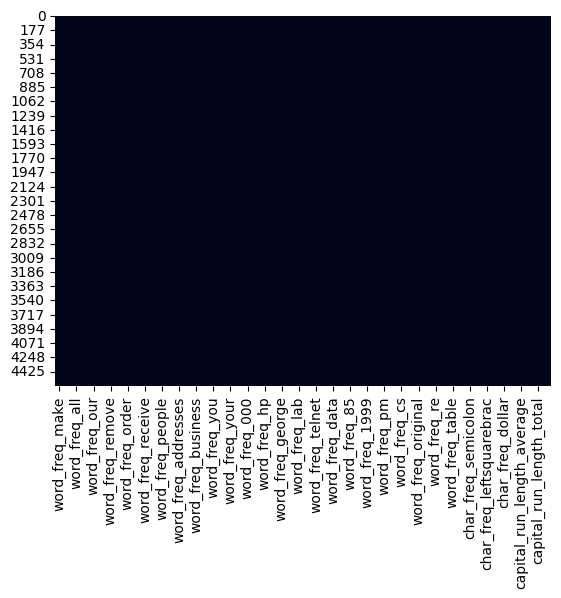

In [ ]:
sns.heatmap(df.isna(),cbar=False)

In [11]:
df['spam'].value_counts()

0    2788
1    1813
Name: spam, dtype: int64

<ipython-input-9-984f2f3f09d7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-9-984f2f3f09d7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-9-984f2f3f09d7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0

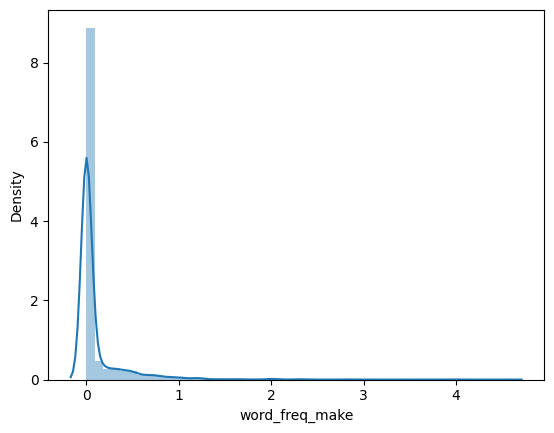

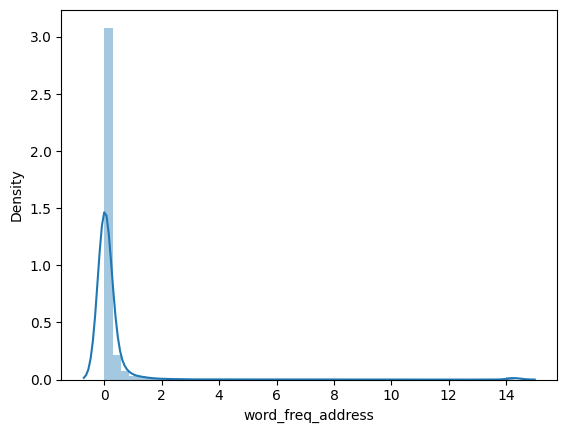

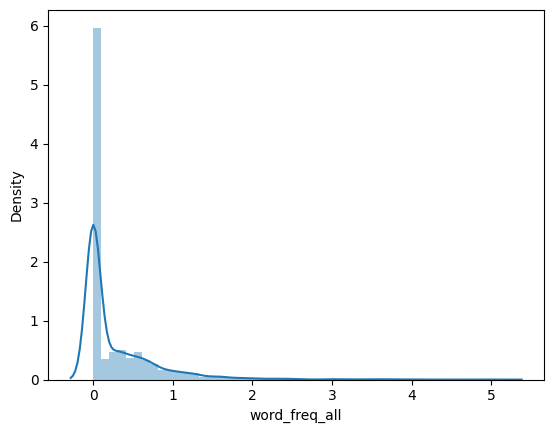

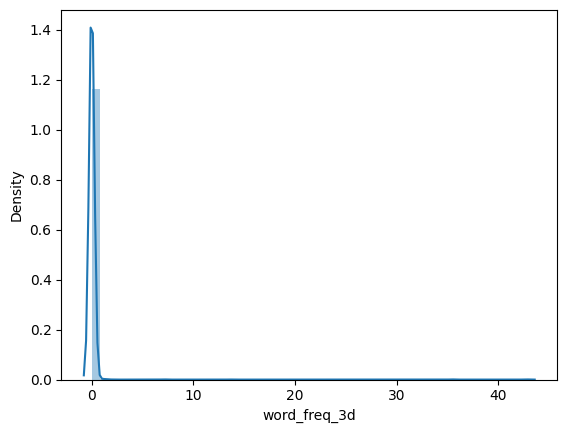

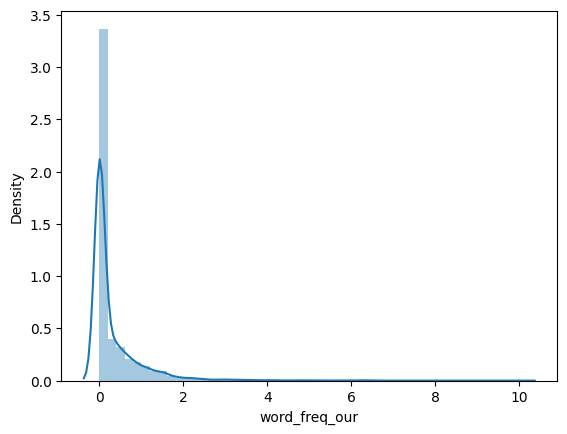

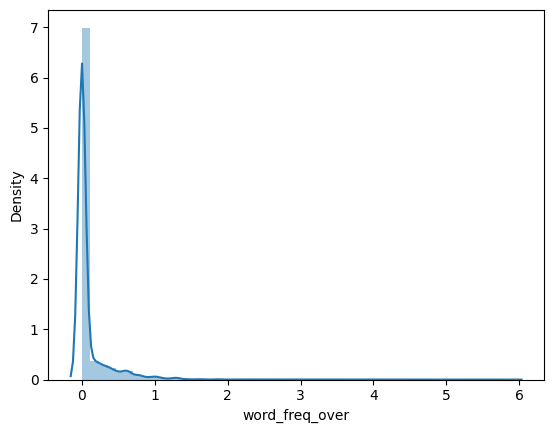

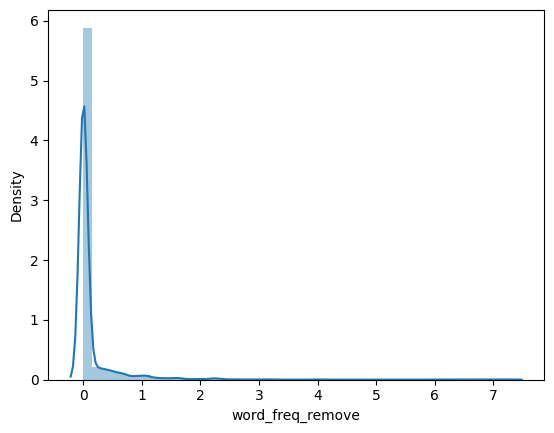

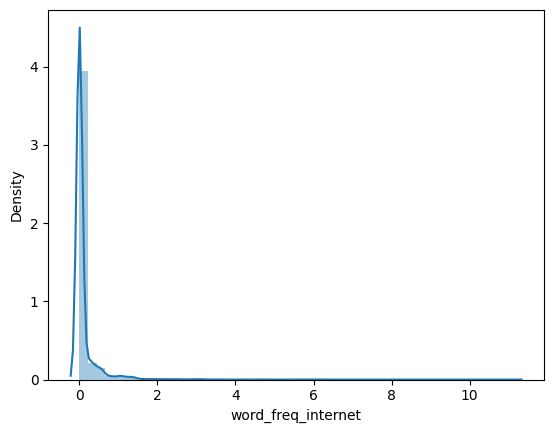

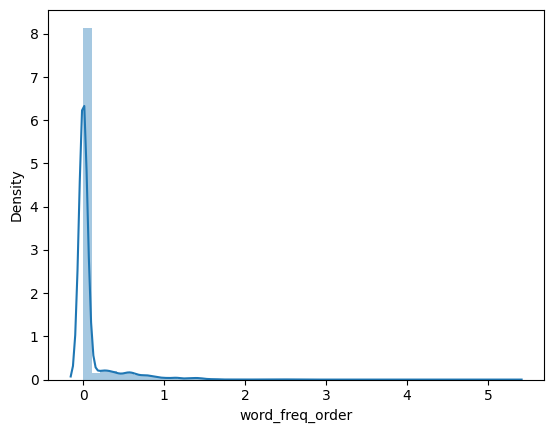

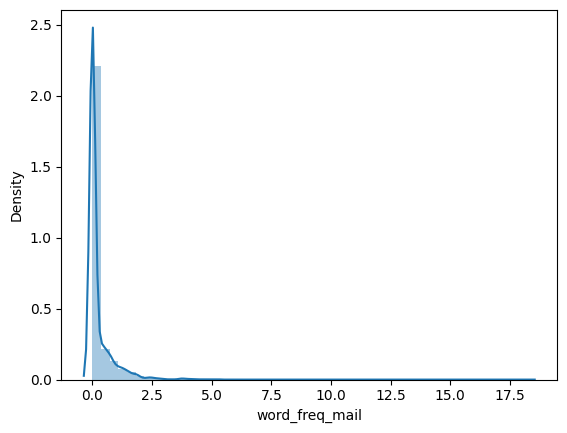

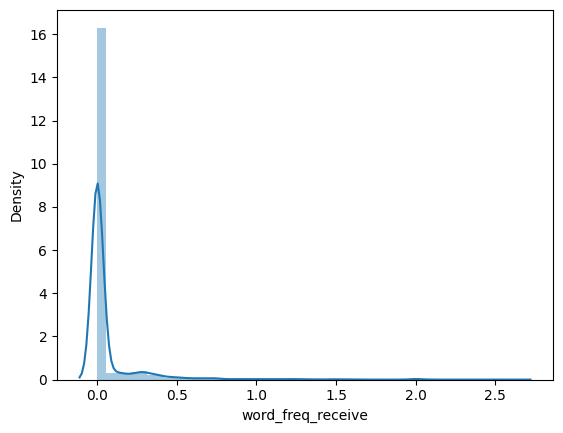

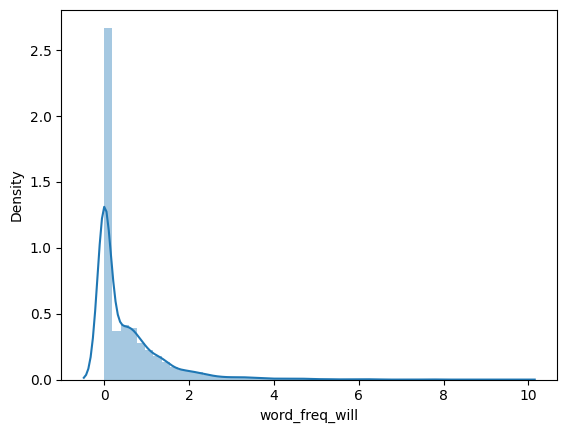

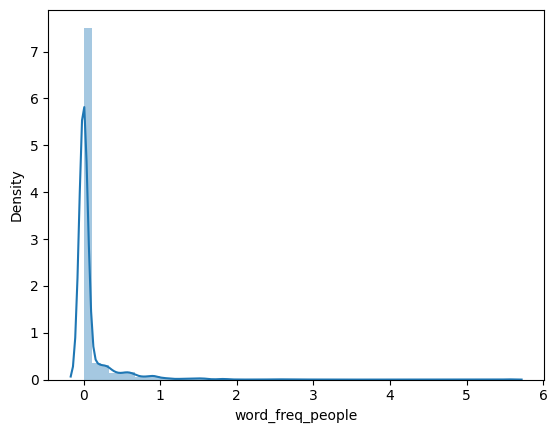

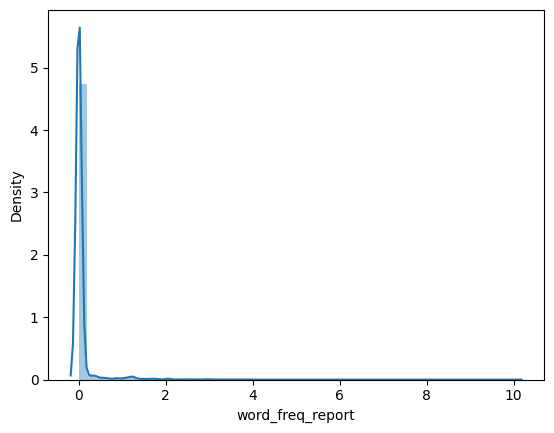

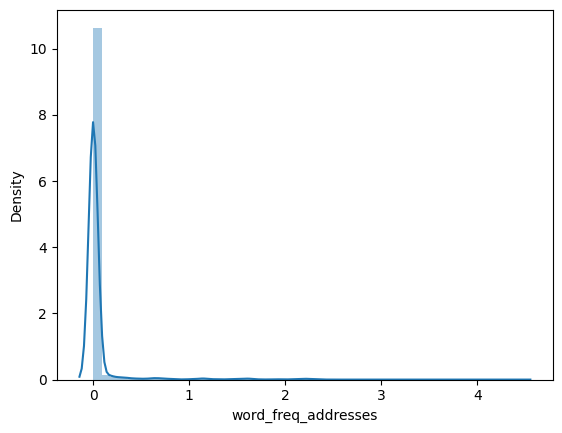

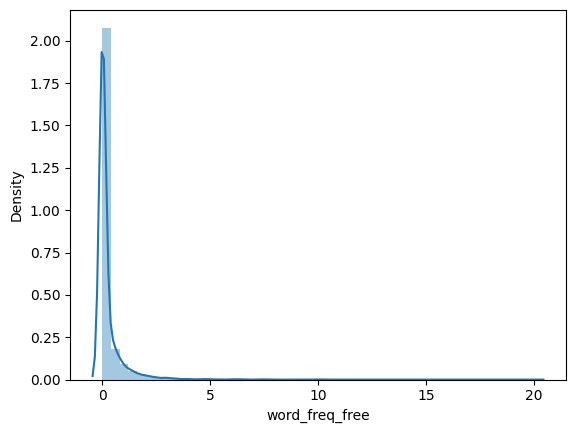

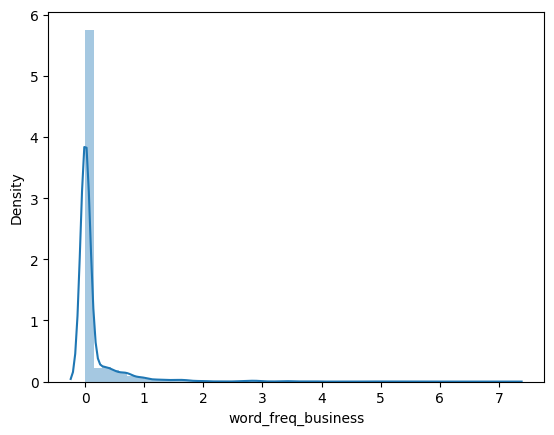

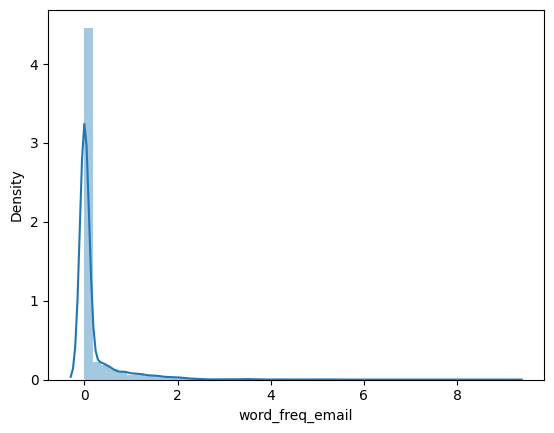

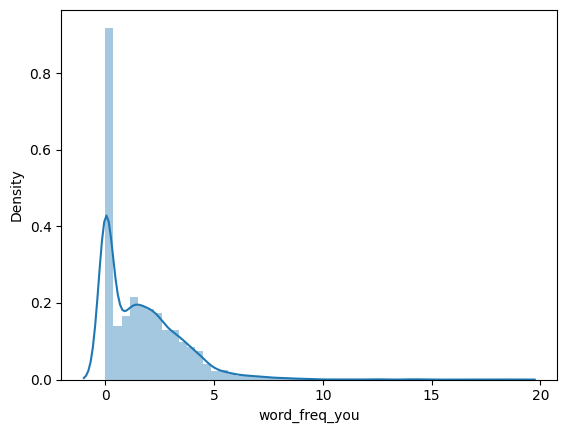

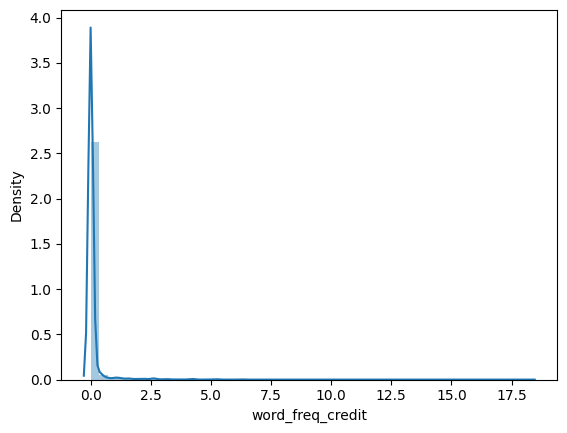

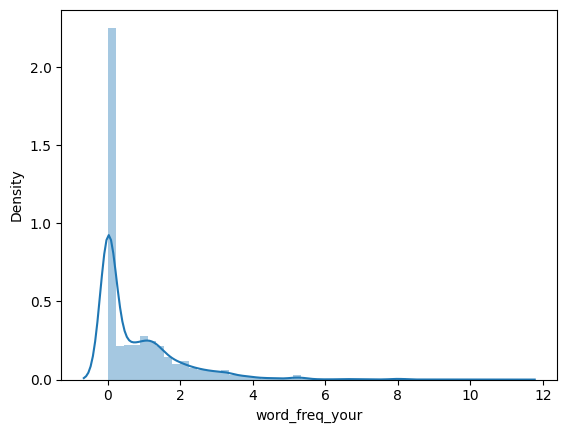

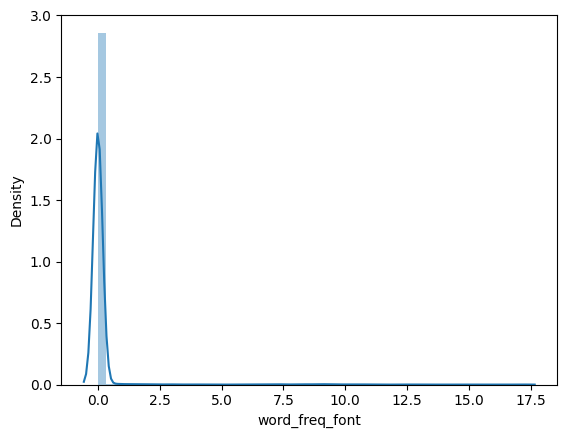

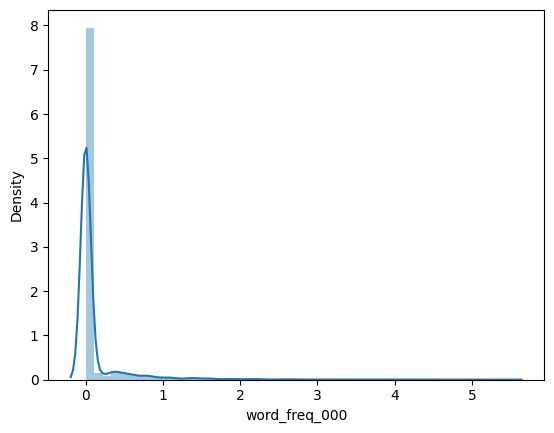

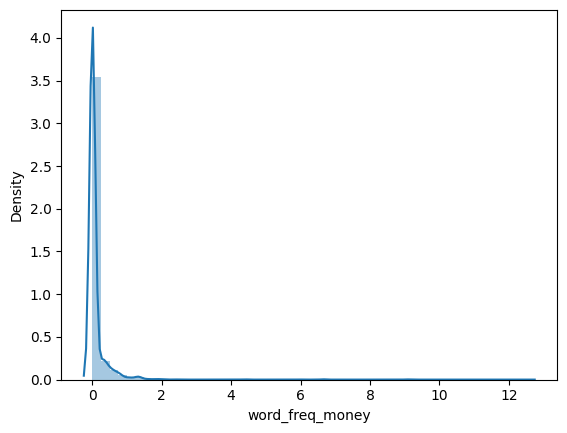

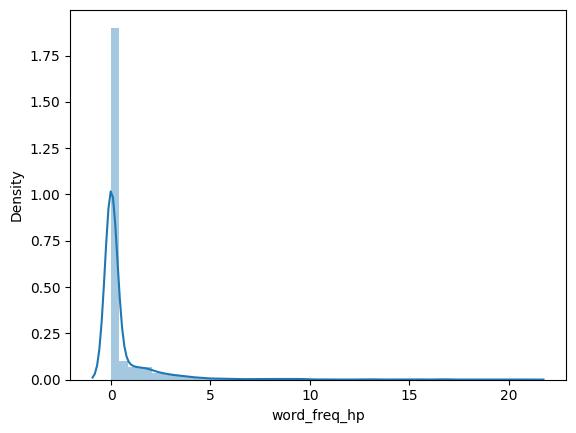

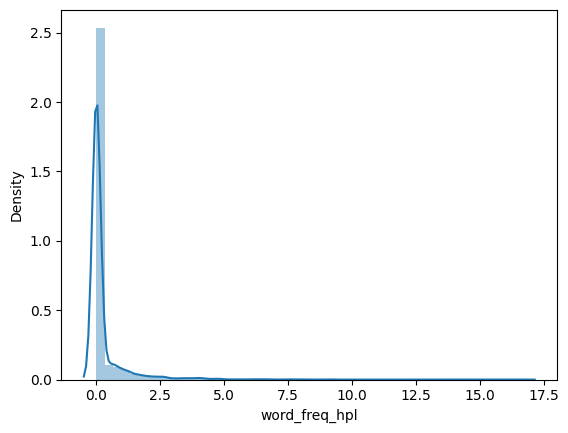

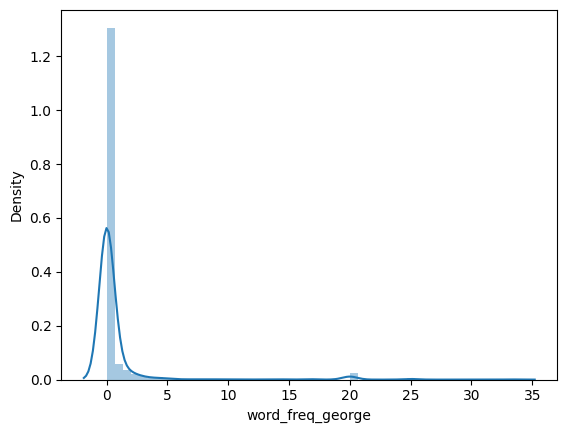

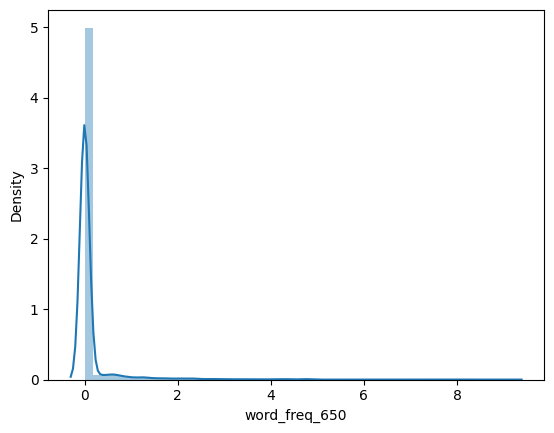

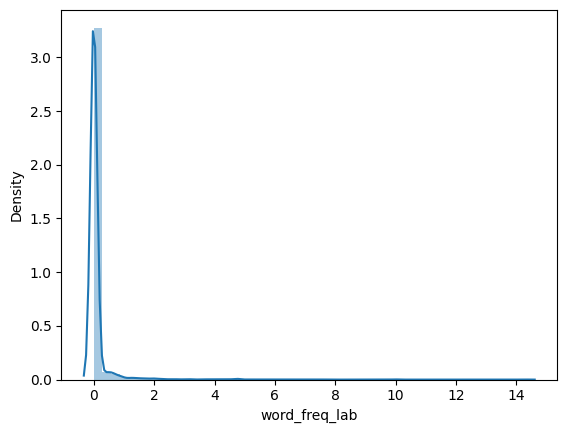

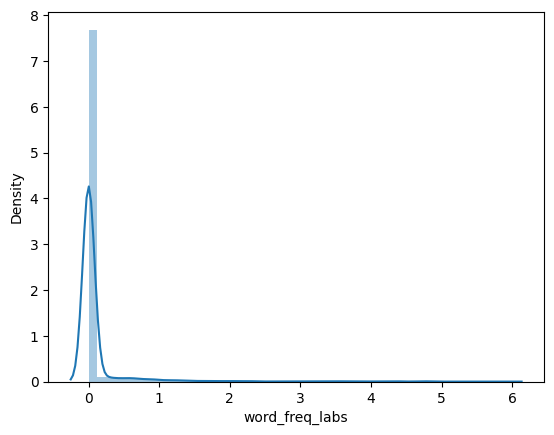

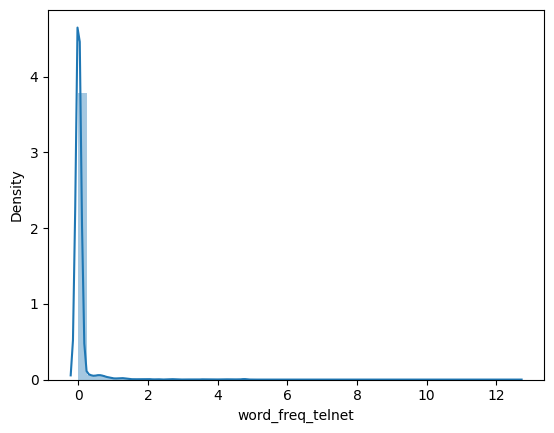

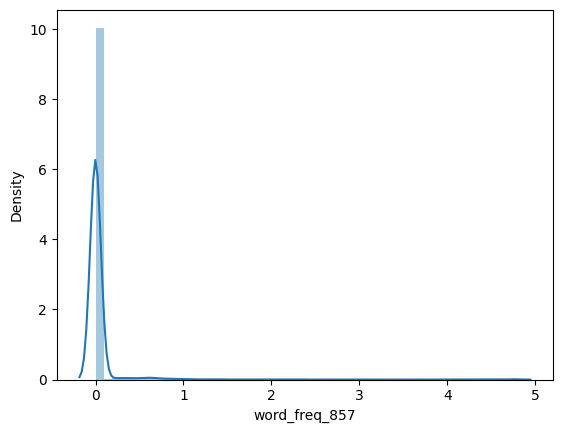

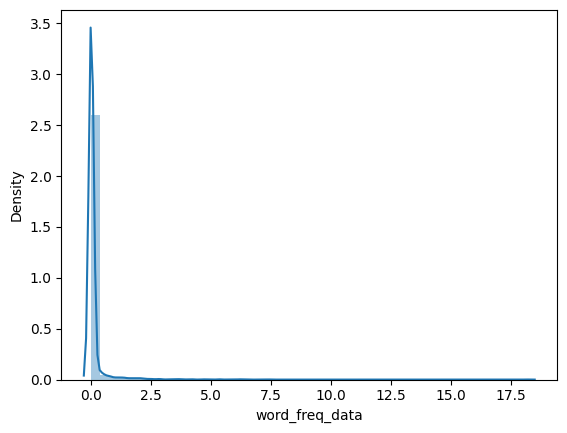

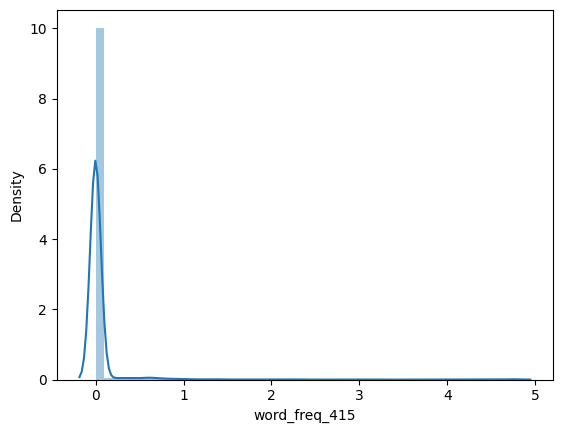

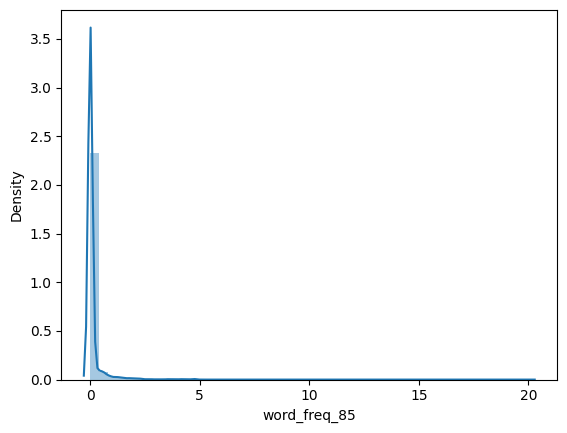

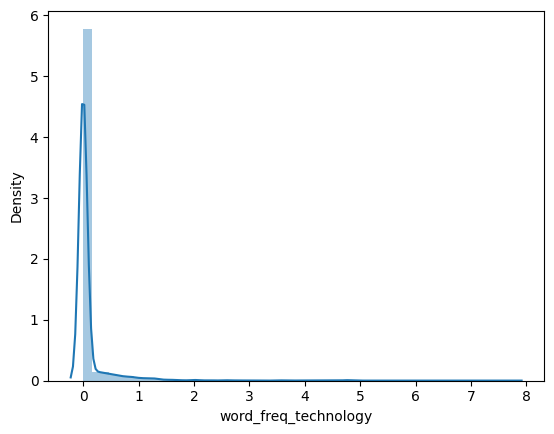

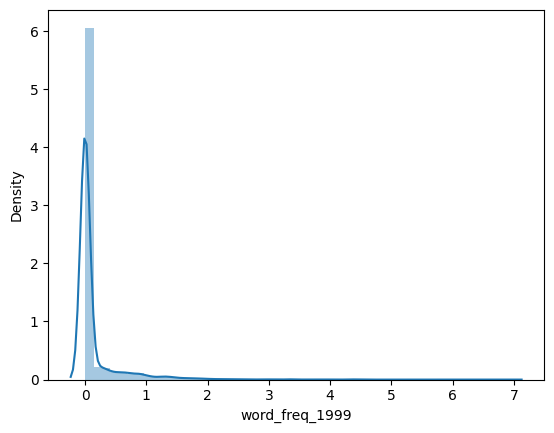

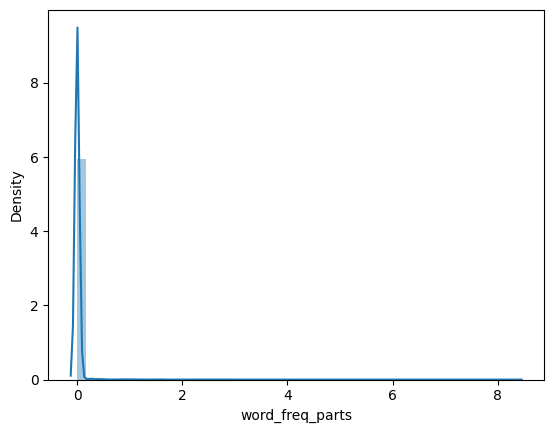

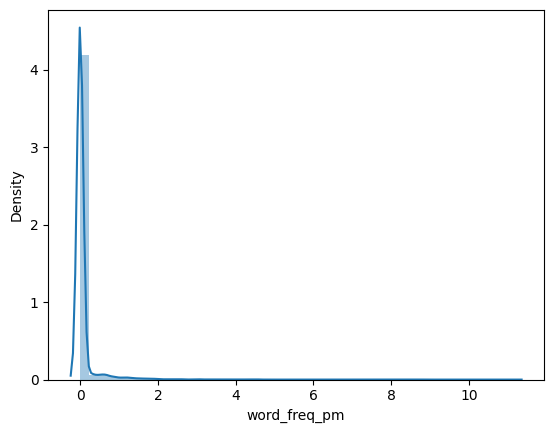

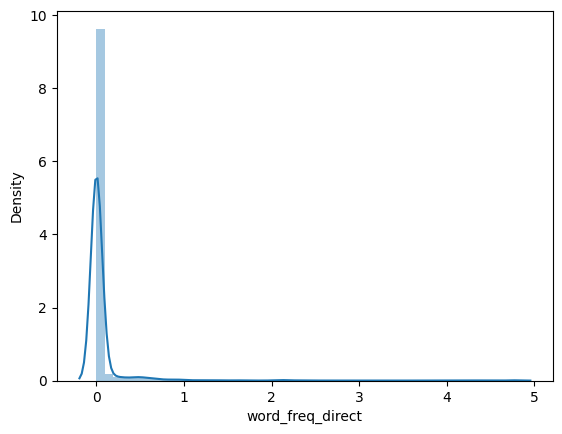

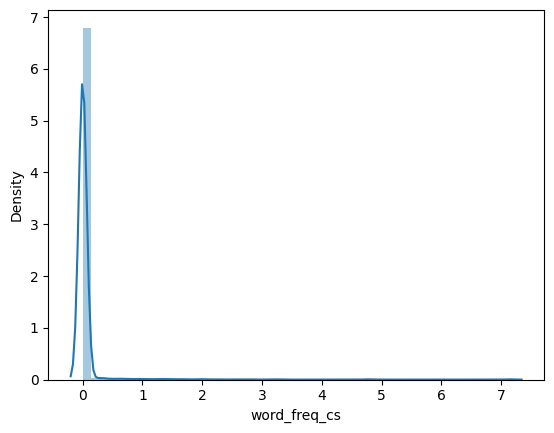

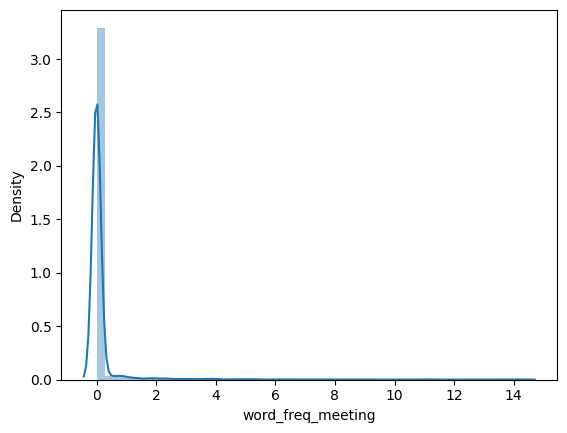

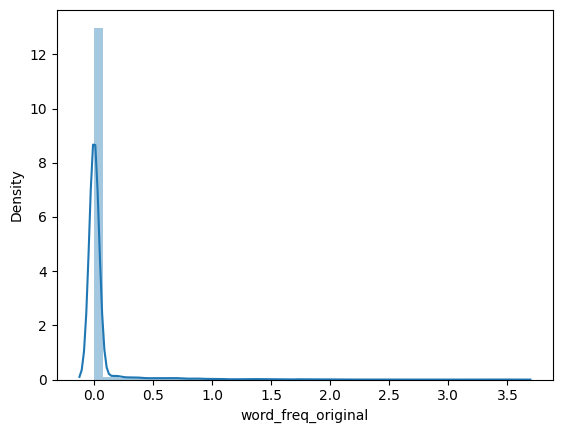

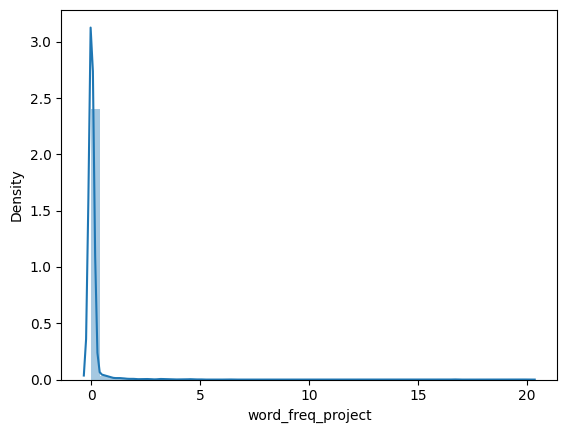

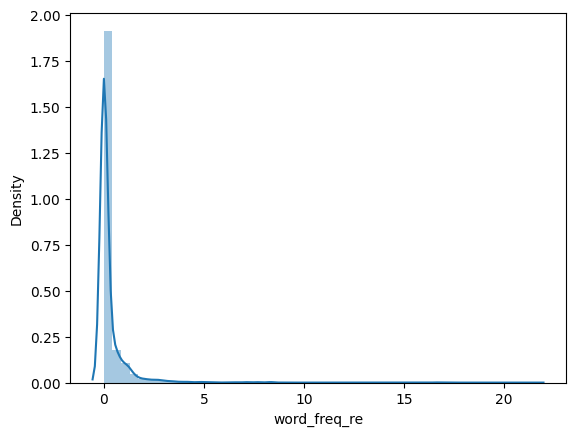

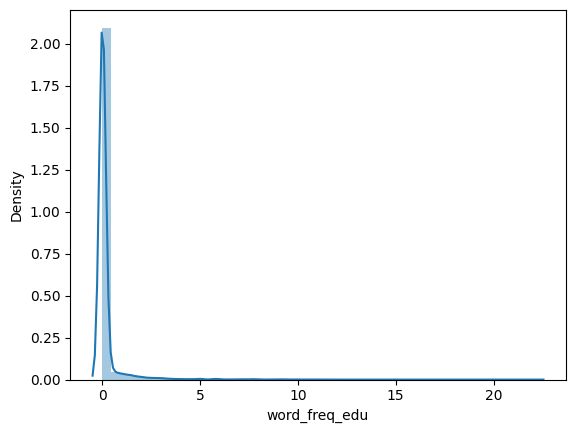

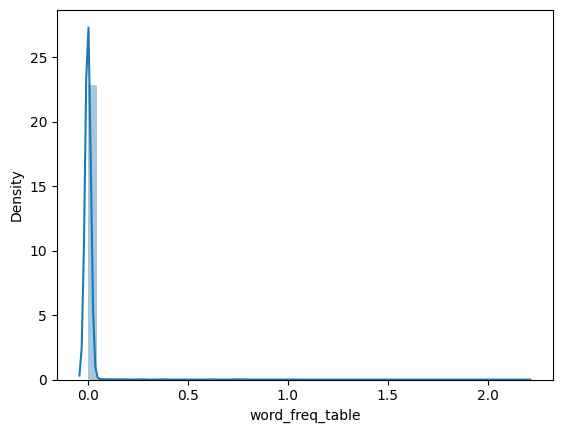

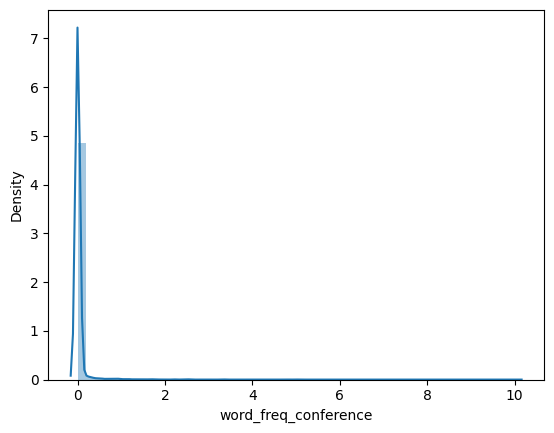

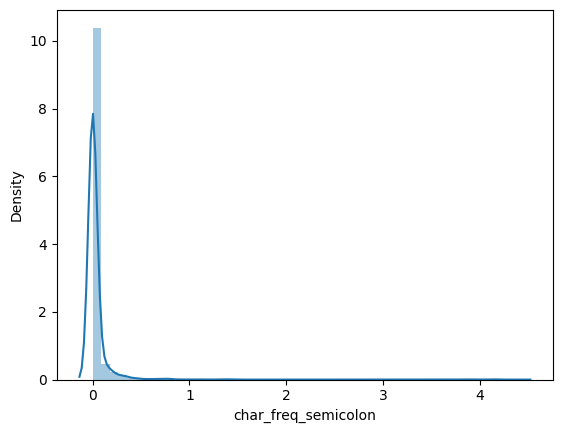

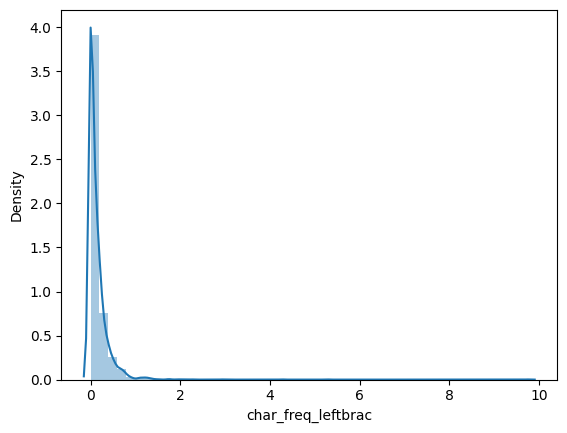

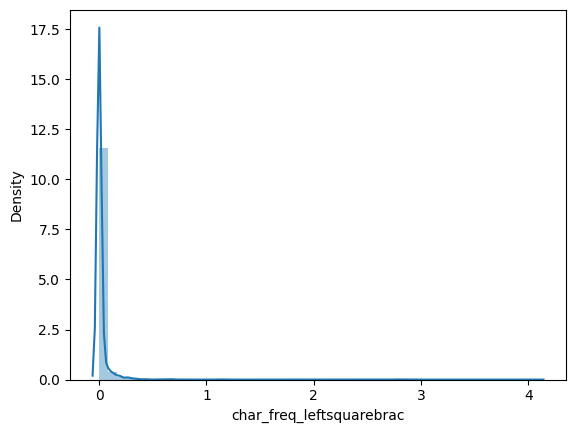

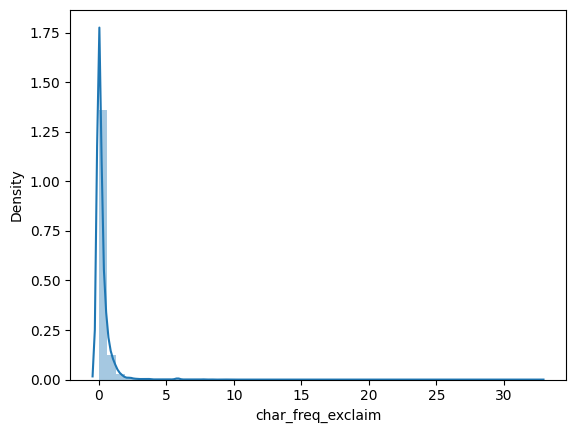

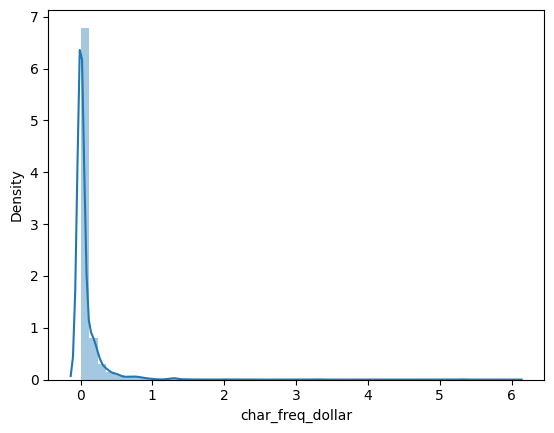

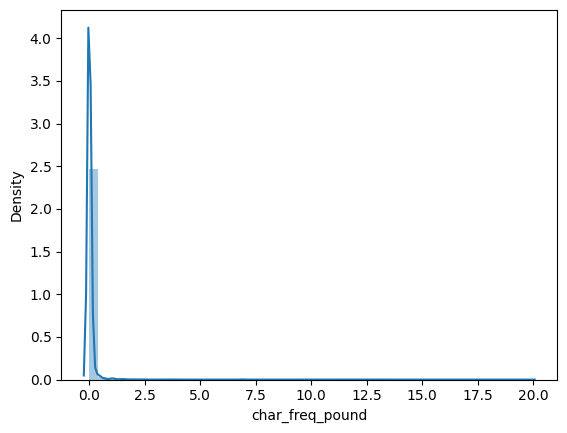

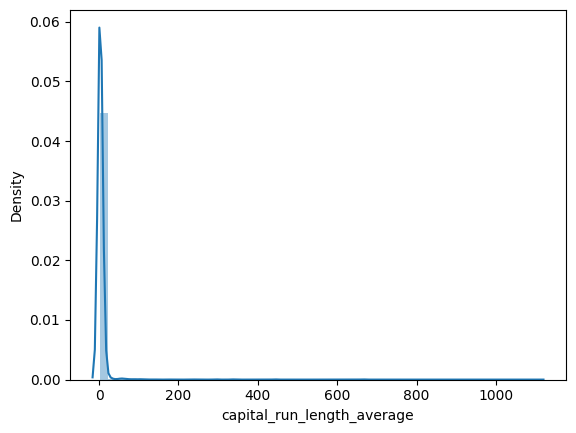

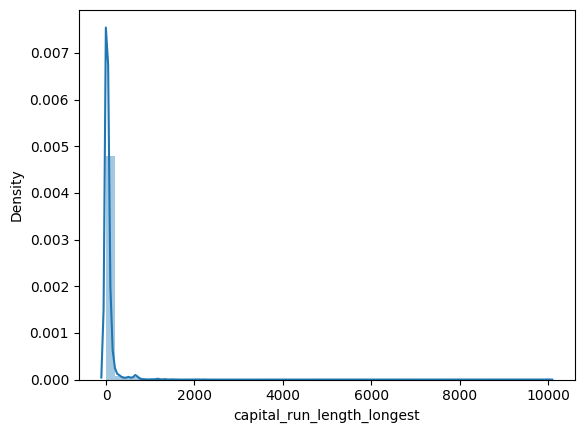

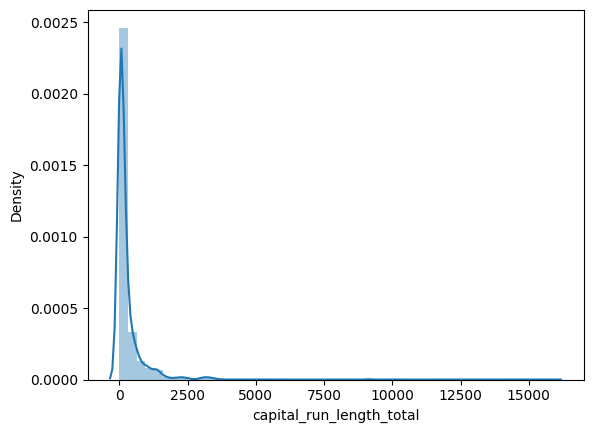

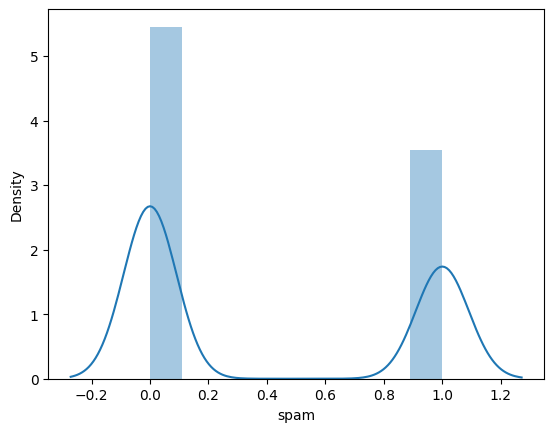

In [ ]:
for col in df.select_dtypes('float'):
#     print(col)
    plt.figure()
    sns.distplot(df[col])

for col in df.select_dtypes('int'):
#     print(col)
    plt.figure()
    sns.distplot(df[col])

In [ ]:
positive_df=df[df['spam']==True]
negative_df=df[df['spam']==False]

<ipython-input-11-d510c3253eae>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col],label='positive')
<ipython-input-11-d510c3253eae>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col],label='négative')
<ipython-input-11-d510c3253eae>:3: UserWarning: 

`distplot` is 

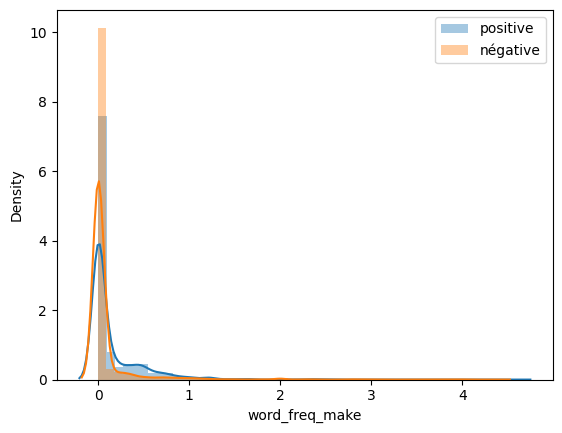

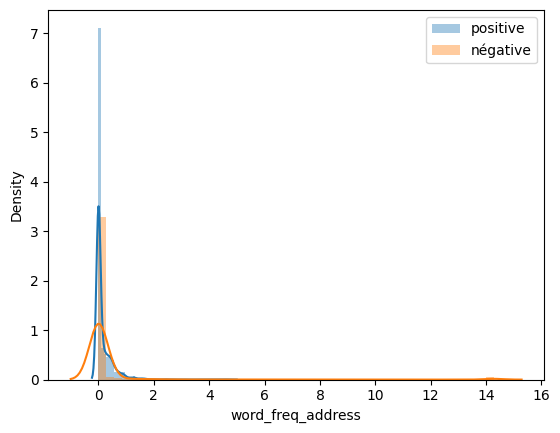

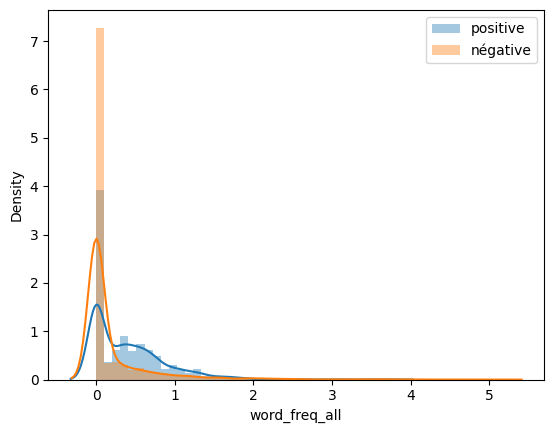

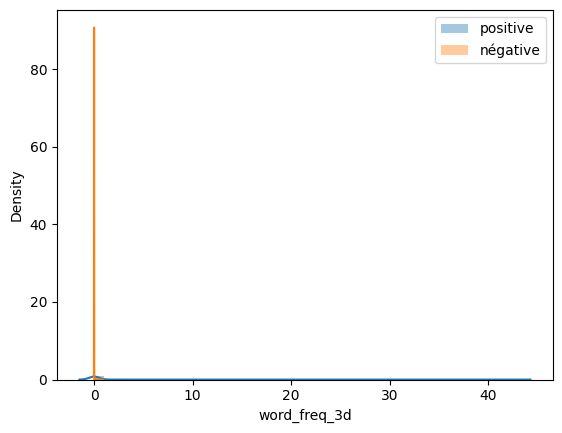

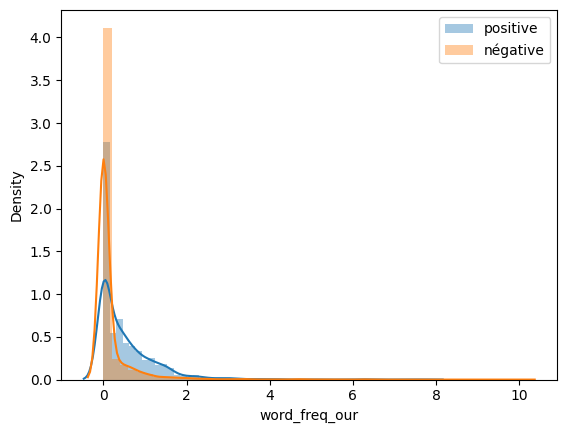

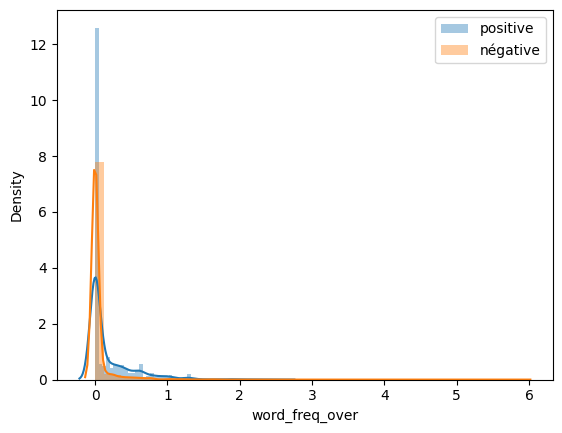

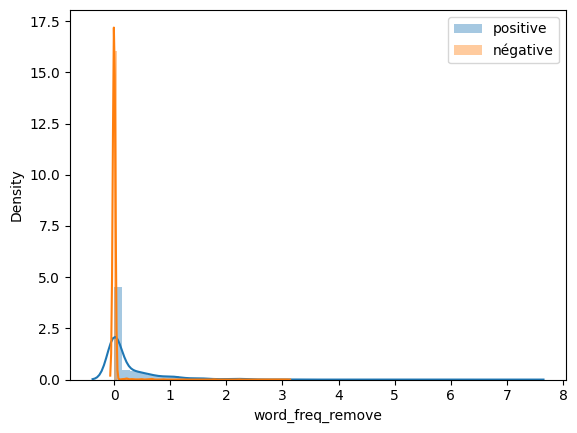

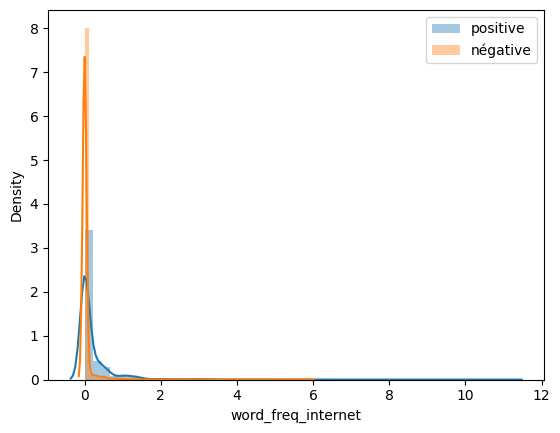

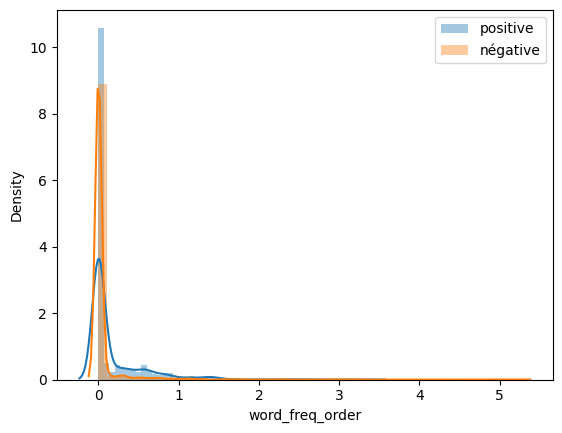

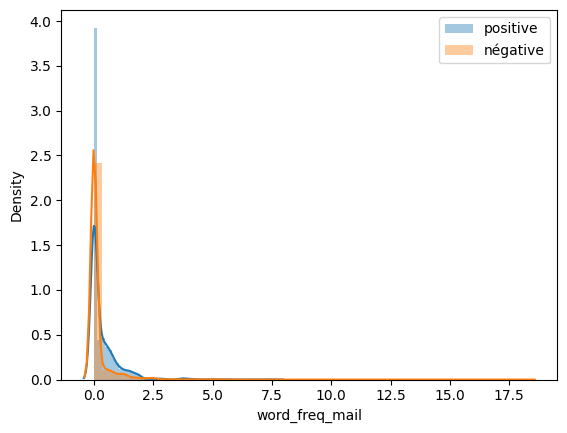

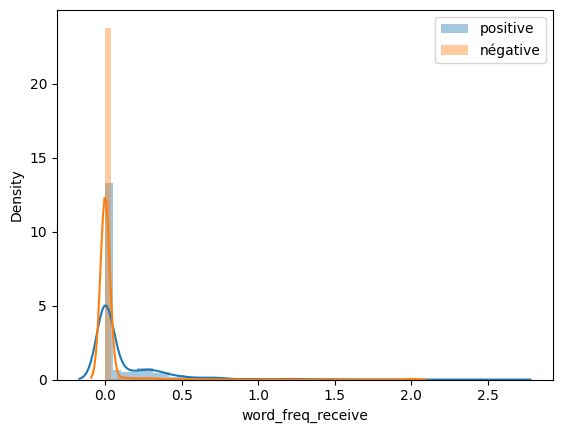

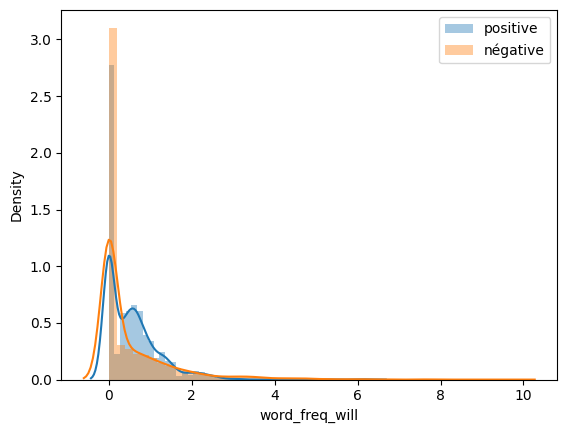

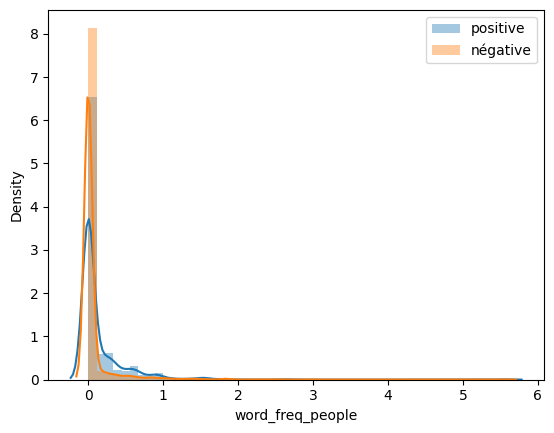

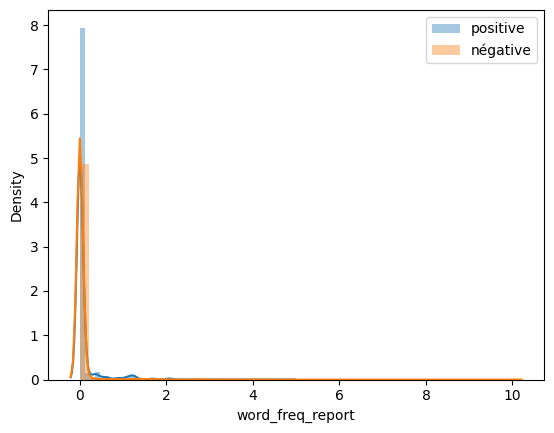

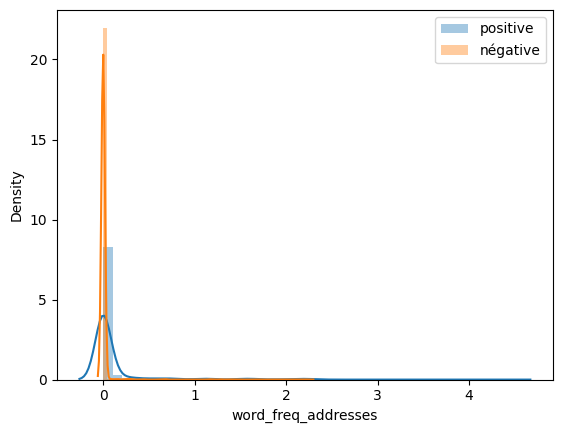

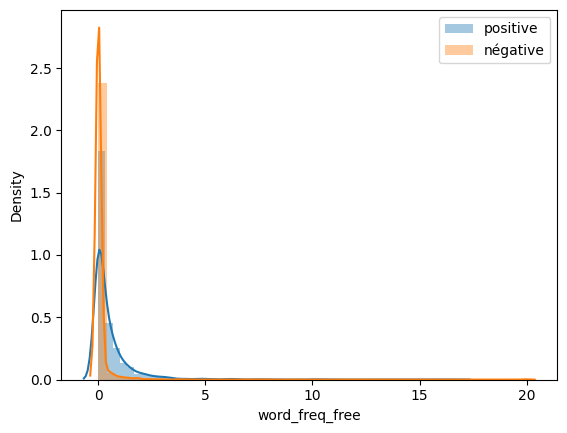

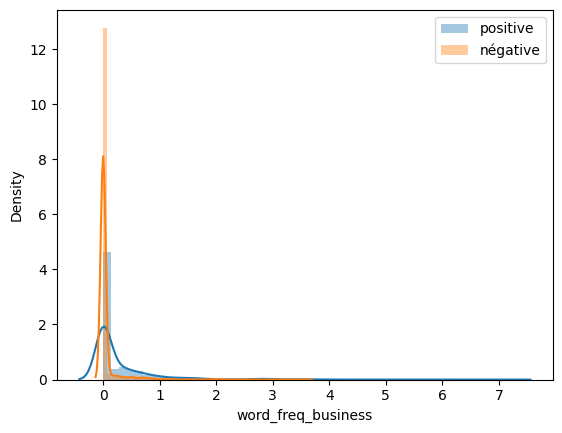

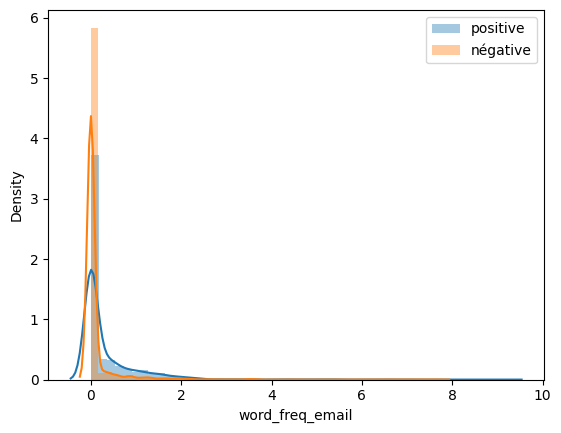

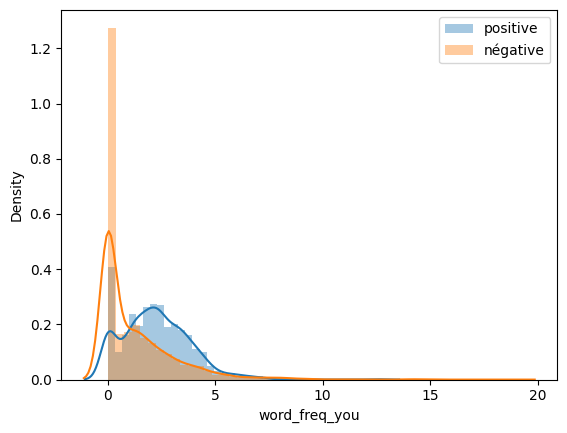

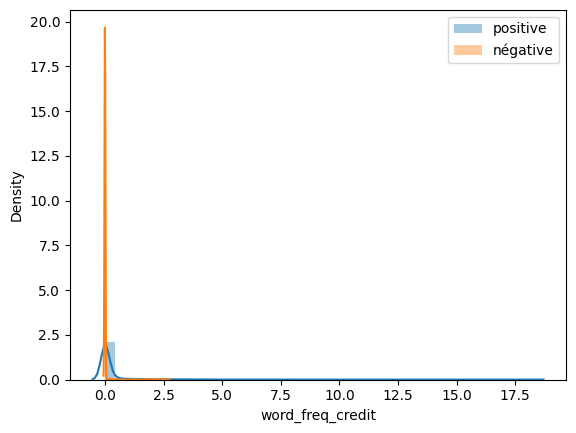

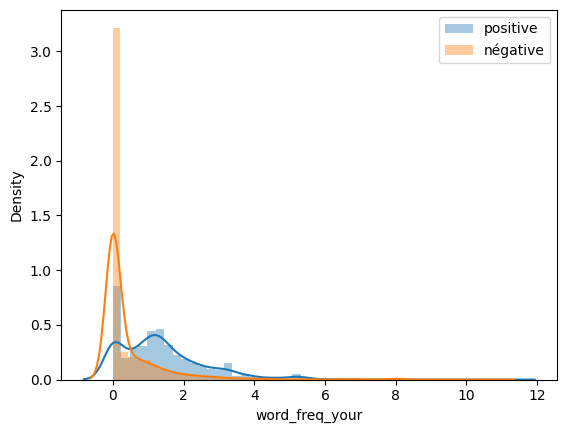

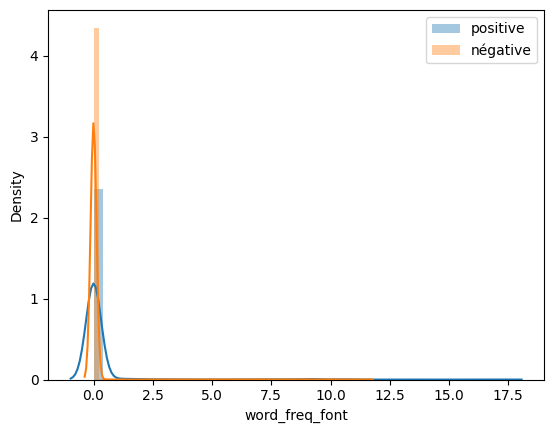

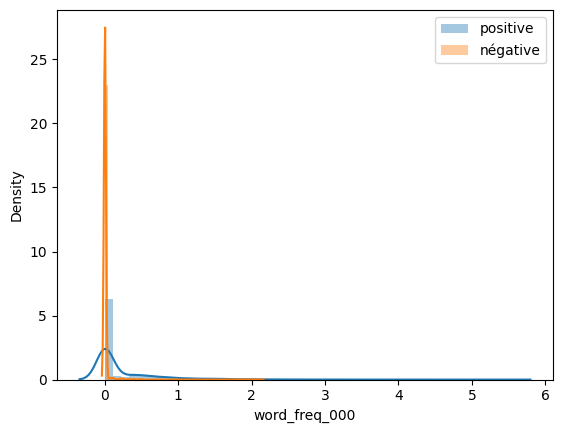

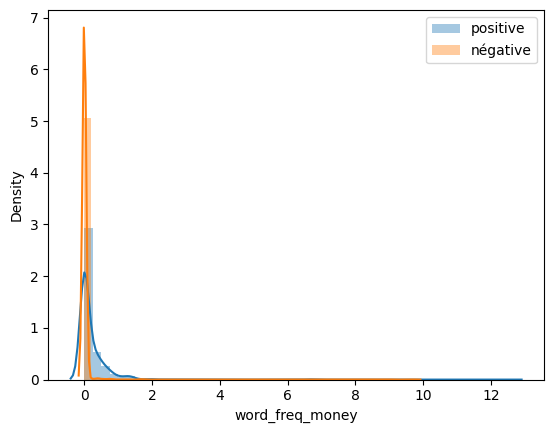

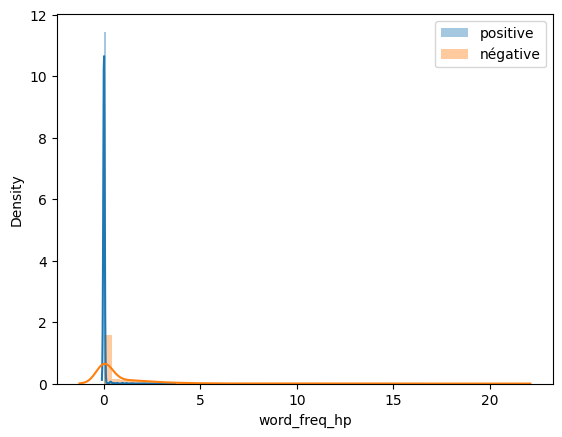

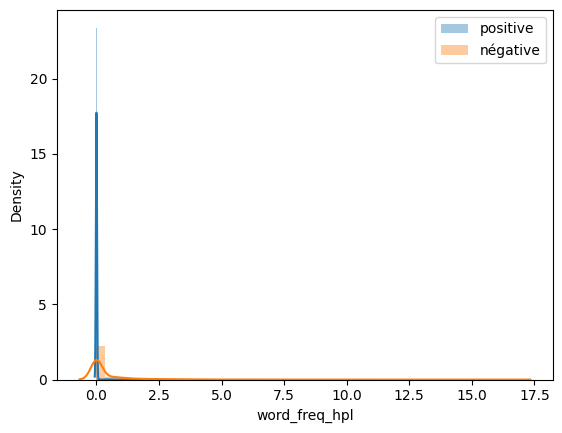

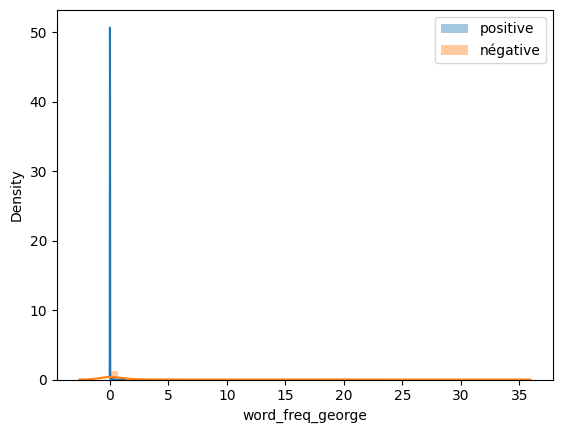

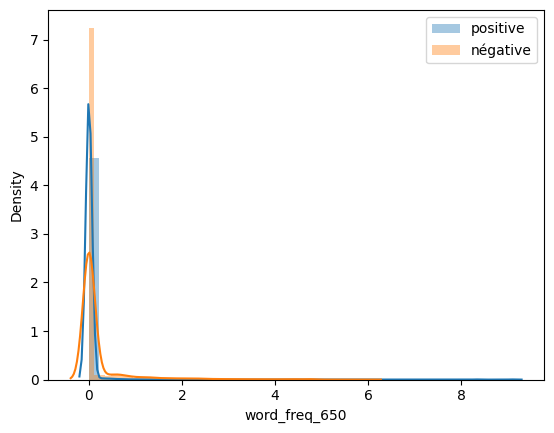

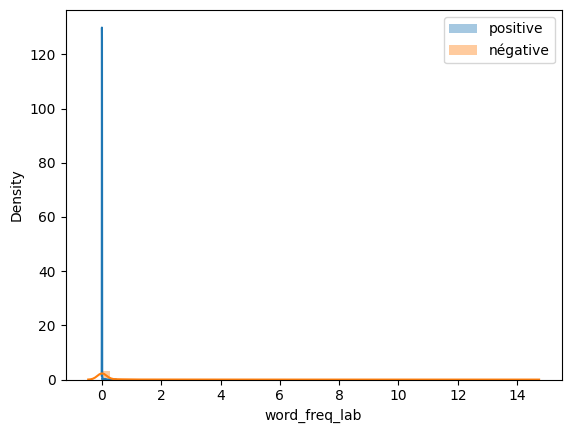

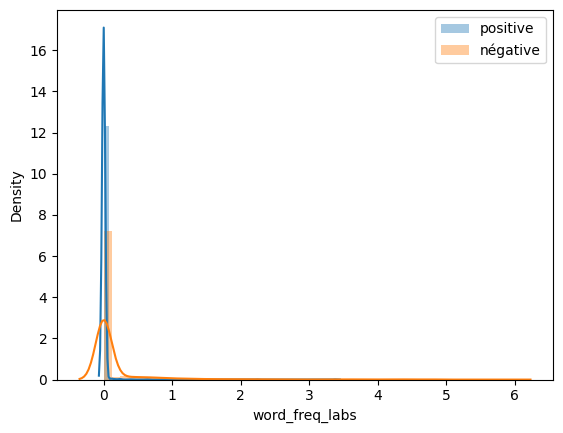

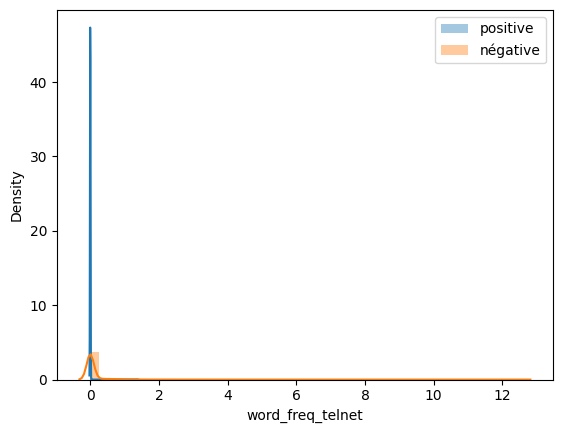

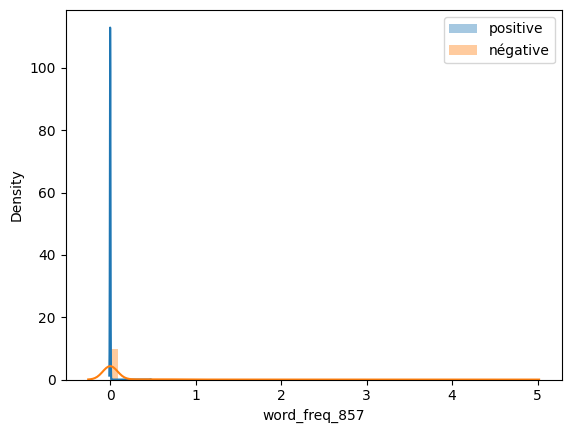

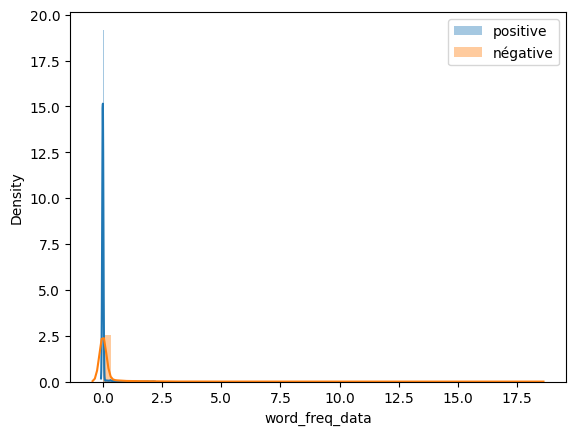

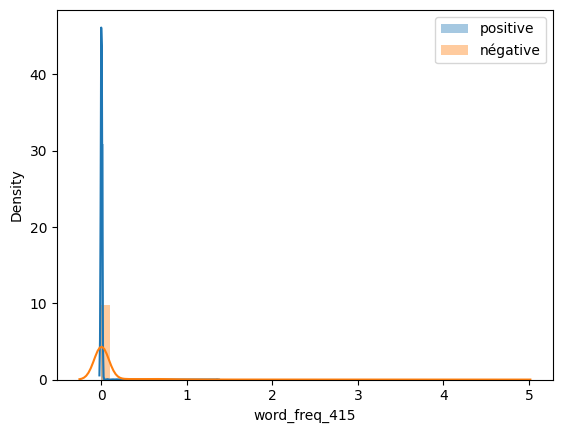

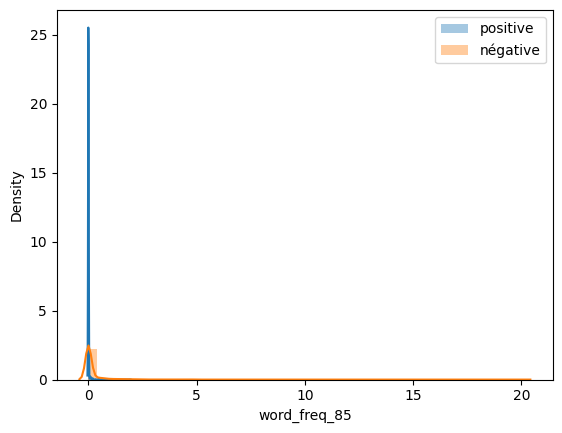

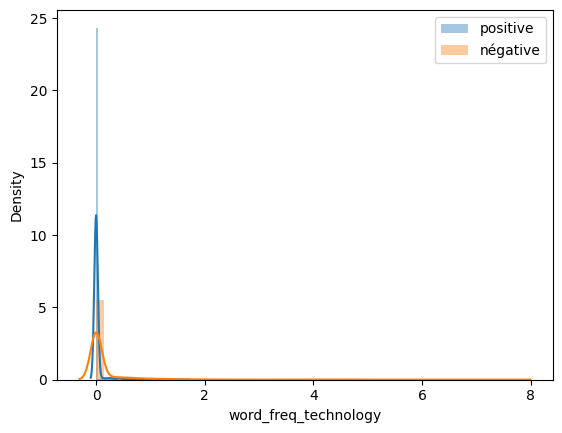

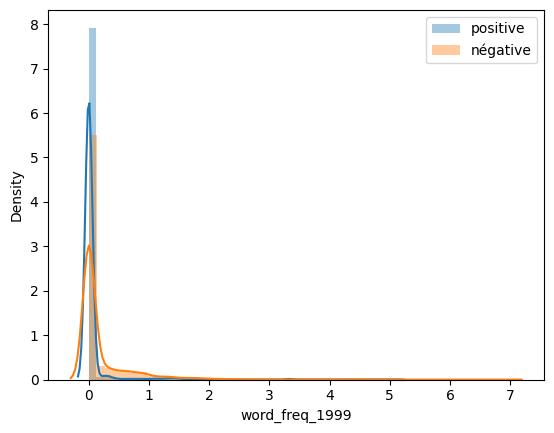

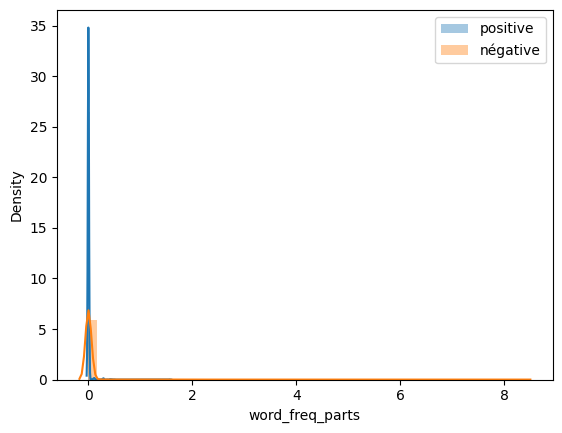

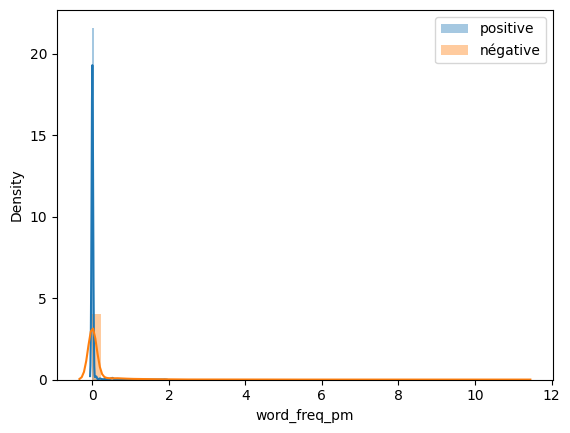

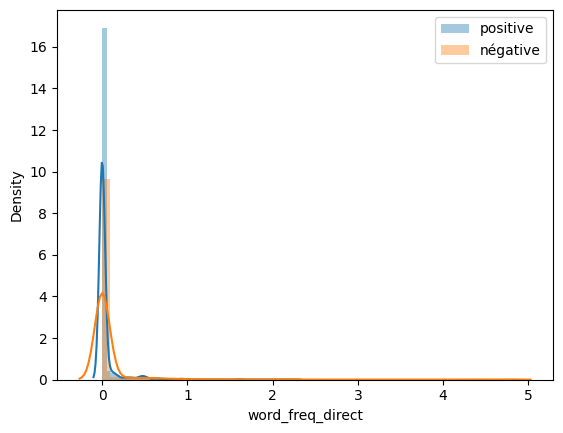

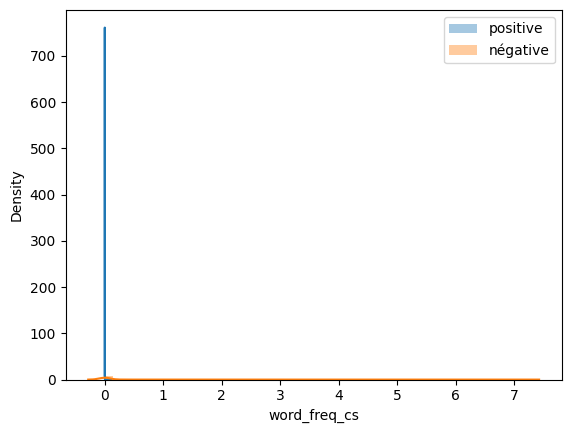

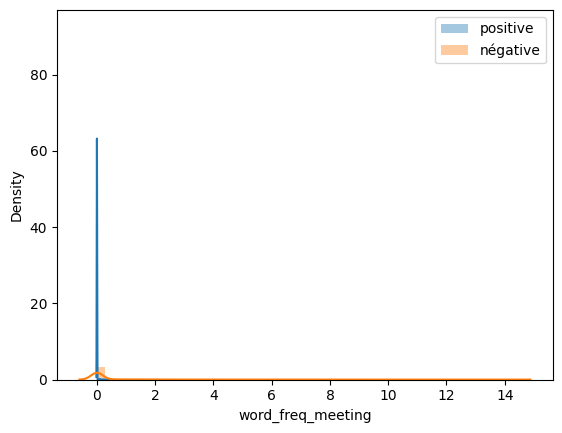

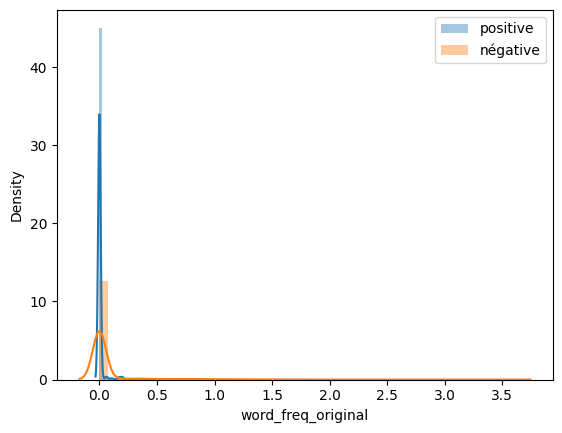

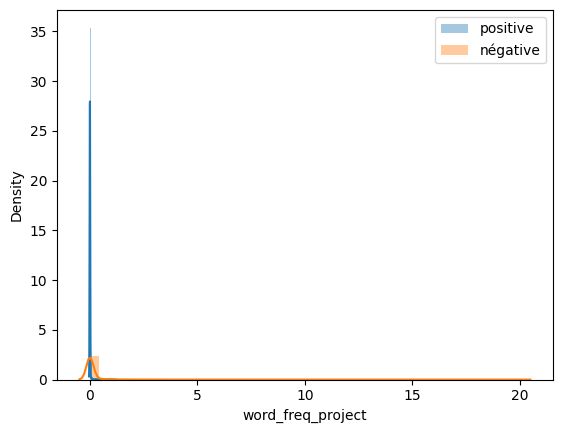

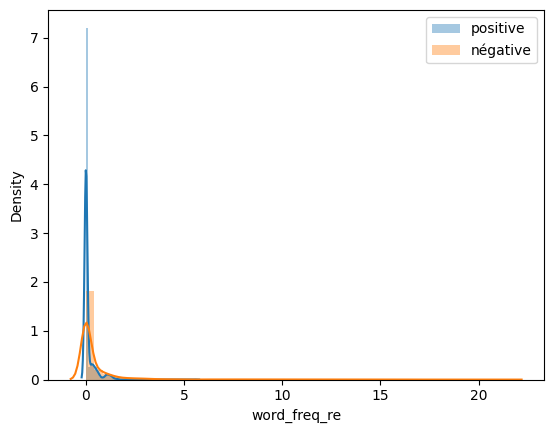

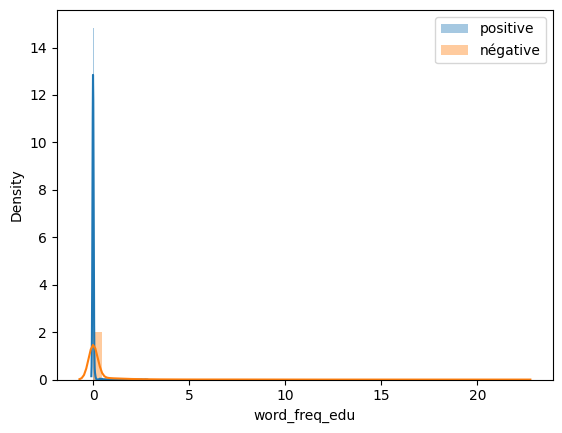

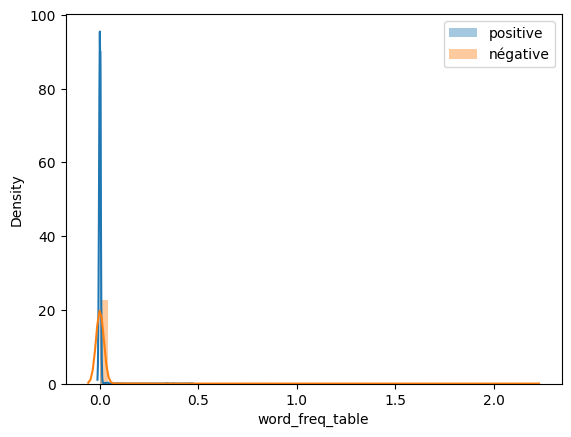

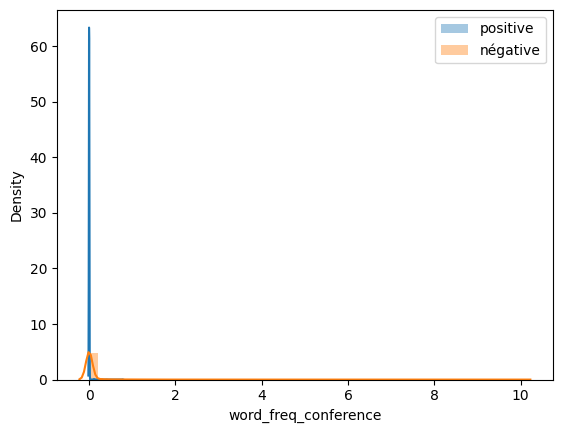

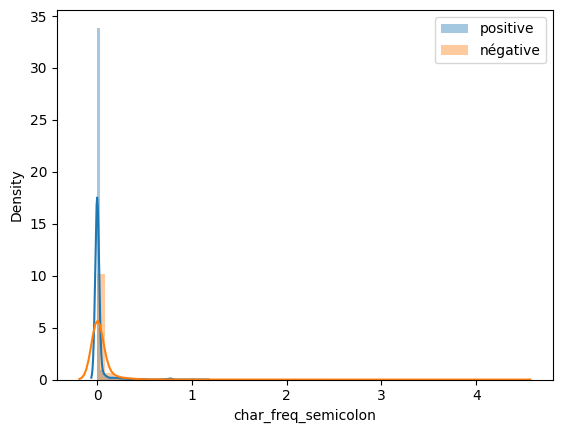

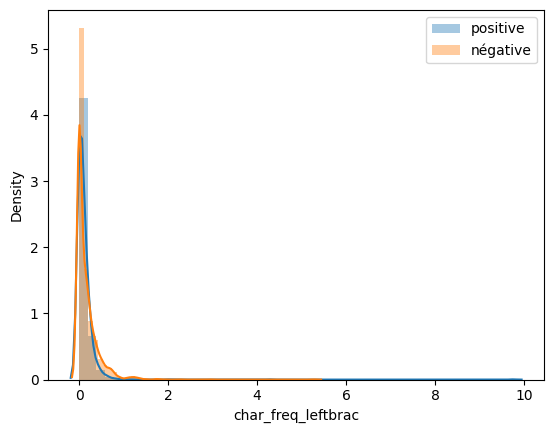

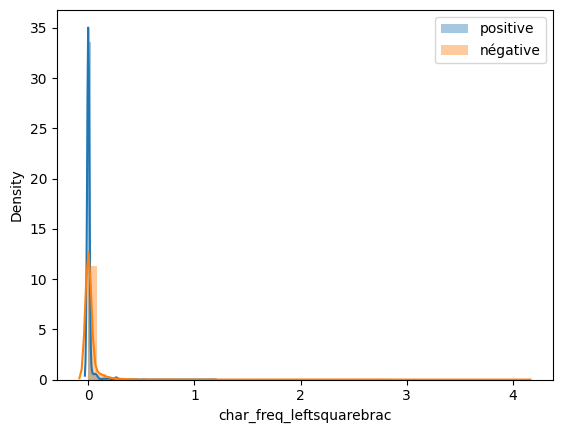

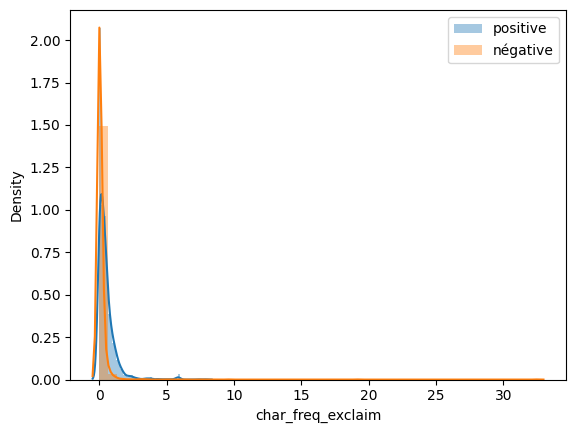

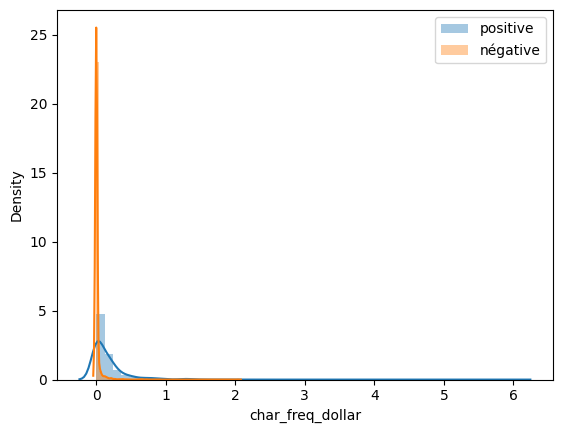

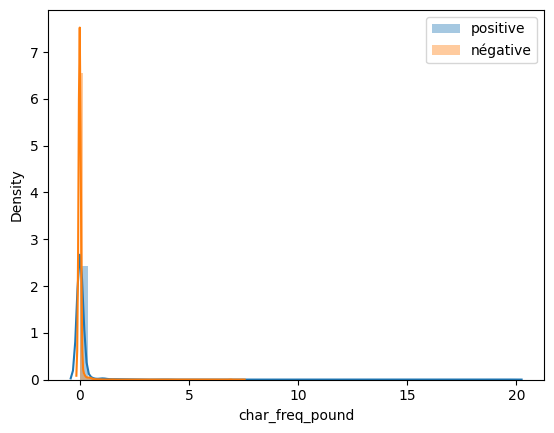

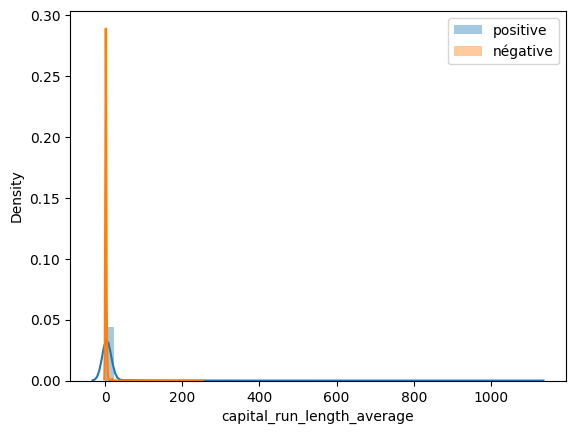

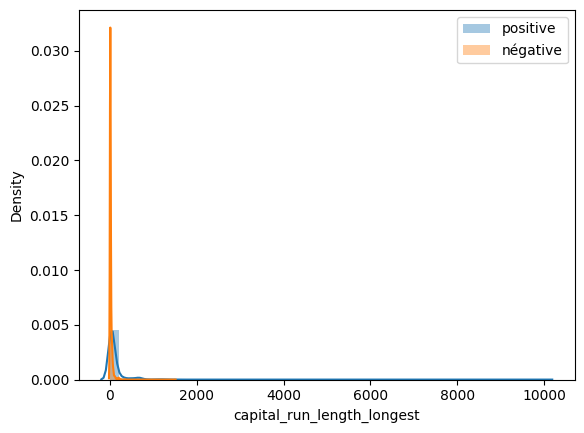

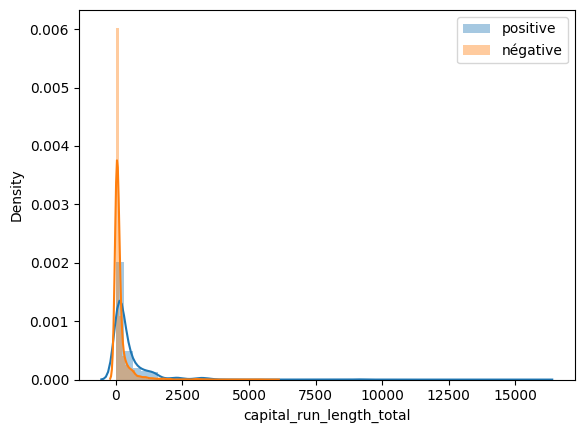

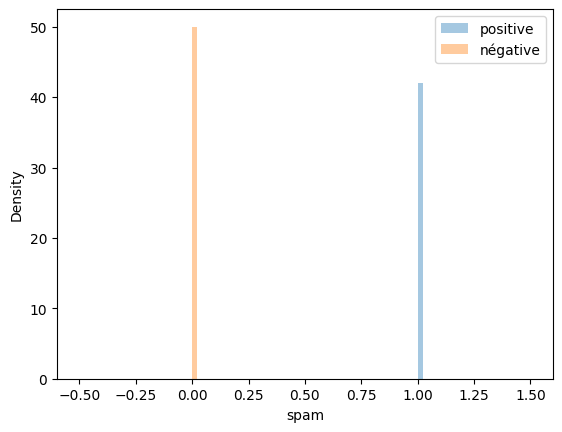

In [ ]:
for col in df.columns :
    plt.figure()
    sns.distplot(positive_df[col],label='positive')
    sns.distplot(negative_df[col],label='négative')
    plt.legend()

<Axes: >

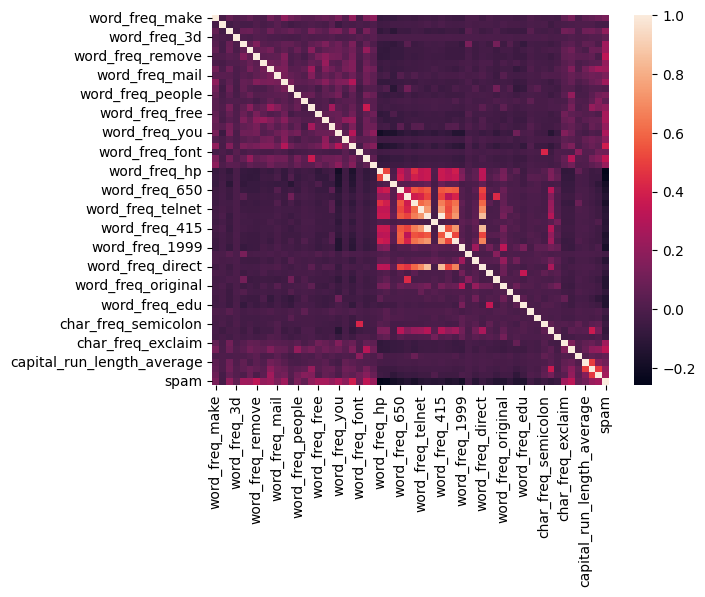

In [ ]:
sns.heatmap(df[df.columns].corr())

In [4]:
X = df.drop("spam", axis = 1)
y = df["spam"]

In [11]:
X = StandardScaler().fit_transform(X)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
y_train.value_counts()

0    2250
1    1430
Name: spam, dtype: int64

In [11]:
y_test.value_counts()

0    538
1    383
Name: spam, dtype: int64

In [5]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [6]:
def evaluation(model):

    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))


    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()


In [21]:
def sigmoid(z):
    z = np.clip(z, -100, 100)
    return 1 / (1 + np.exp(-z))

def logistic_loss(y, y_predicted):
    epsilon = 1e-15
    y_predicted = np.clip(y_predicted, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))

def train_logistic_regression(X_train, y_train, X_test, y_test, learning_rate, n_iter):

    n_samples, n_features = X_train.shape
    weights = np.zeros(n_features)
    bias = 0
    losses_train = []
    losses_test = []

    for i in range(n_iter):
        predictions_train = predict_logistic_regression(X_train, weights, bias)
        y_train = np.array(y_train)
        loss_train = logistic_loss(y_train, predictions_train)
        losses_train.append(loss_train)
        predictions_test = predict_logistic_regression(X_test, weights, bias)
        y_test = np.array(y_test)
        loss_test = logistic_loss(y_test, predictions_test)
        losses_test.append(loss_test)
        dw = - (1 / n_samples) * np.dot(X_train.T, (y_train - predictions_train))
        db = - (1 / n_samples) * np.sum(y_train - predictions_train)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if i % 1000 == 0 or i == n_iter - 1:
            train_accuracy = accuracy_score(X_train, y_train, weights, bias)
            test_accuracy = accuracy_score(X_test, y_test, weights, bias)
            print(f'Iter {i}, Train loss: {loss_train:.4f}, Test loss: {loss_test:.4f}, Train accuracy: {train_accuracy:.2f}, Test accuracy: {test_accuracy:.2f}')

    plt.plot(losses_train, label='Train Loss')
    plt.plot(losses_test, label='Test Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return weights, bias

def predict_logistic_regression(X, weights, bias):
    predictions = sigmoid(np.dot(X, weights) + bias)
    return predictions

def accuracy_score(X, y, weights, bias):
    predictions = predict_logistic_regression(X, weights, bias)
    prediction_class = [1 if i > 0.5 else 0 for i in predictions]
    nb_right_predictions = np.sum(prediction_class == y)
    return nb_right_predictions/len(y)

Iter 0, Train loss: 0.6931, Test loss: 0.6931, Train accuracy: 0.90, Test accuracy: 0.89
Iter 1000, Train loss: 0.2397, Test loss: 0.2529, Train accuracy: 0.92, Test accuracy: 0.91
Iter 2000, Train loss: 0.2275, Test loss: 0.2425, Train accuracy: 0.92, Test accuracy: 0.91
Iter 3000, Train loss: 0.2217, Test loss: 0.2387, Train accuracy: 0.92, Test accuracy: 0.91
Iter 4000, Train loss: 0.2181, Test loss: 0.2366, Train accuracy: 0.92, Test accuracy: 0.91
Iter 5000, Train loss: 0.2156, Test loss: 0.2354, Train accuracy: 0.92, Test accuracy: 0.91
Iter 6000, Train loss: 0.2137, Test loss: 0.2347, Train accuracy: 0.92, Test accuracy: 0.91
Iter 7000, Train loss: 0.2122, Test loss: 0.2342, Train accuracy: 0.92, Test accuracy: 0.91
Iter 8000, Train loss: 0.2110, Test loss: 0.2340, Train accuracy: 0.93, Test accuracy: 0.91
Iter 9000, Train loss: 0.2100, Test loss: 0.2338, Train accuracy: 0.93, Test accuracy: 0.91
Iter 9999, Train loss: 0.2091, Test loss: 0.2338, Train accuracy: 0.93, Test accura

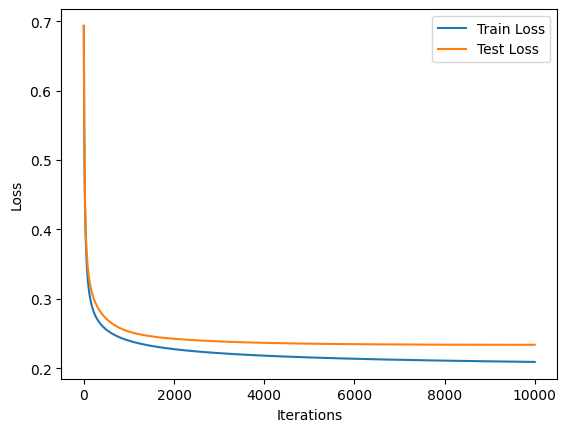

In [22]:
weights, bias = train_logistic_regression(X_train, y_train, X_test, y_test, learning_rate=0.05, n_iter=10000)

In [24]:
y_pred = predict_logistic_regression(X_test, weights, bias)
# Assuming y_pred contains continuous values between 0 and 1
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# Now use y_test and y_pred_binary in the classification report
print(classification_report(y_test, y_pred_binary))


              precision    recall  f1-score   support

           0       0.91      0.94      0.93       538
           1       0.91      0.87      0.89       383

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.91       921
weighted avg       0.91      0.91      0.91       921



In [20]:
preprocessor = make_pipeline(PolynomialFeatures(3, include_bias=False), SelectKBest(f_classif, k=14))

[[500  38]
 [ 79 304]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       538
           1       0.89      0.79      0.84       383

    accuracy                           0.87       921
   macro avg       0.88      0.86      0.87       921
weighted avg       0.87      0.87      0.87       921



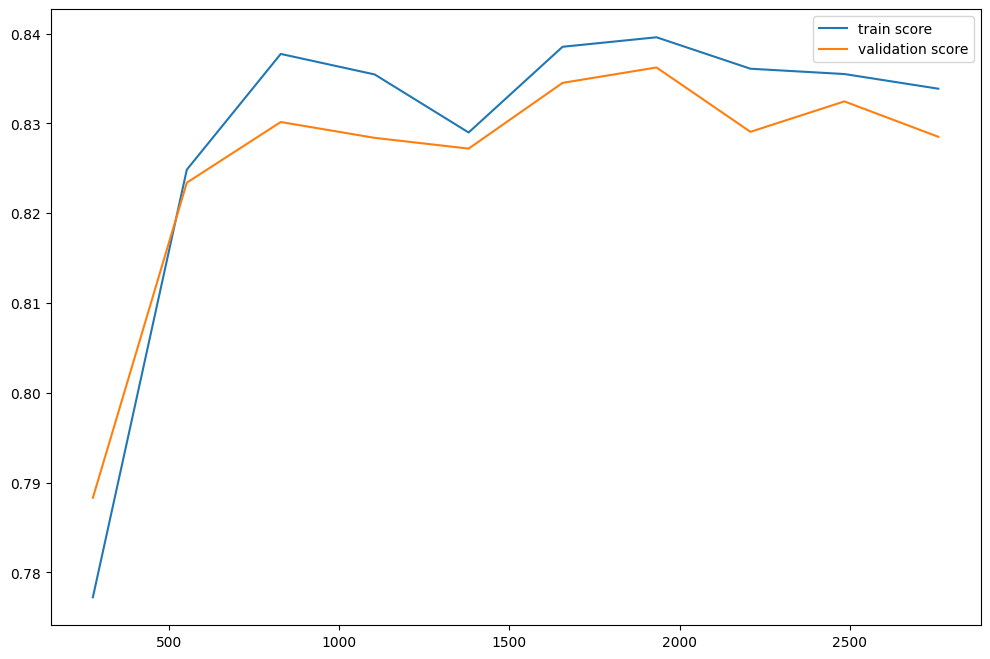

In [38]:
LogisticRegression = make_pipeline(preprocessor, LogisticRegression( C=0.1, max_iter=500, solver='lbfgs', random_state=0))
evaluation(LogisticRegression)

In [ ]:
LogisticRegression

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=8))])),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=500, random_state=0))])

In [45]:
hyper_params_Reg = {'pipeline__polynomialfeatures__degree':[0, 1, 2, 3],
               'pipeline__selectkbest__k': range(8, 32),
                  'logisticregression__C':[0.01, 0.1]}

from sklearn.model_selection import GridSearchCV

grid_Reg = GridSearchCV(LogisticRegression, param_grid=hyper_params_Reg, cv=6)

grid_Reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
288 fits failed out of a total of 1152.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('polynomialfeatures',
                                                         PolynomialFeatures(degree=3,
                                                                            include_bias=False)),
                                                        ('selectkbest',
                                                         SelectKBest(k=14))])),
                                       ('logisticregression',
                                        LogisticRegression(C=0.1, max_iter=500,
                                                           random_state=0))]),
             param_grid={'logisticregression__C': [0.01, 0.1],
                         'pipeline__polynomialfeatures__degree': [0, 1, 2, 3],
                         'pipeline__selectkbest__k': range(8, 32)})

In [46]:
print(grid_Reg.best_params_)

y_pred = grid_Reg.predict(X_test)

print(classification_report(y_test, y_pred))

{'logisticregression__C': 0.1, 'pipeline__polynomialfeatures__degree': 1, 'pipeline__selectkbest__k': 31}
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       538
           1       0.92      0.85      0.88       383

    accuracy                           0.90       921
   macro avg       0.91      0.90      0.90       921
weighted avg       0.90      0.90      0.90       921



In [8]:
df1=df.copy()

In [9]:
corr_matrix = df1.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

seuil_correlation = 0.6

to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > seuil_correlation)]
data_sans_corr1 = df1.drop(to_drop, axis=1)

print("Colonnes conservées après suppression des corrélations:")
data_sans_corr1.head()

Colonnes conservées après suppression des corrélations:


<ipython-input-9-0f20f5471a72>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_semicolon  \
0             0.00            0.00  ...                 0.00   
1             0.00            0.94  ...                 0.00   
2             0.64            0.25  ...                 0.01   
3             0.31            0.63  ...                 0.00   
4             0.31            0.63  ...                 0.00   

   char_freq_leftbrac  char_freq_leftsquarebrac  char_freq_exclaim  \
0               0.000                       0.0              0.778   
1               0.132                       0.0              0.372   
2               0.143                       0.0              0.276   
3               0.137                       0.0              0.137   
4               0.135                       0.0              0.135   

   char_freq_dollar  char_freq_pound  capital_run_length_average  \
0             0.000            0.000                       3.756   
1             0.180            0.048                       5.114   
2             0.184            0.010                       9.821   
3             0.000            0.000                       3.537   
4             0.000            0.000                       3.537   

   capital_run_length_longest  capital_run_length_total  spam  
0                          61                       278     1  
1                         101                      1028     1  
2                         485                      2259     1  
3                          40                       191     1  
4                          40                       191     1  

[5 rows x 53 columns]

In [10]:
X=data_sans_corr1.drop("spam", axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  237   238   243 ... 25329 25805 25808] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[506  32]
 [118 265]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       538
           1       0.89      0.69      0.78       383

    accuracy                           0.84       921
   macro avg       0.85      0.82      0.83       921
weighted avg       0.84      0.84      0.83       921



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   73   106   124 ... 25816 25818 25845] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  106   174   208 ... 25805 25808 25818] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  215   229   230 ... 25714 25805 25808] 

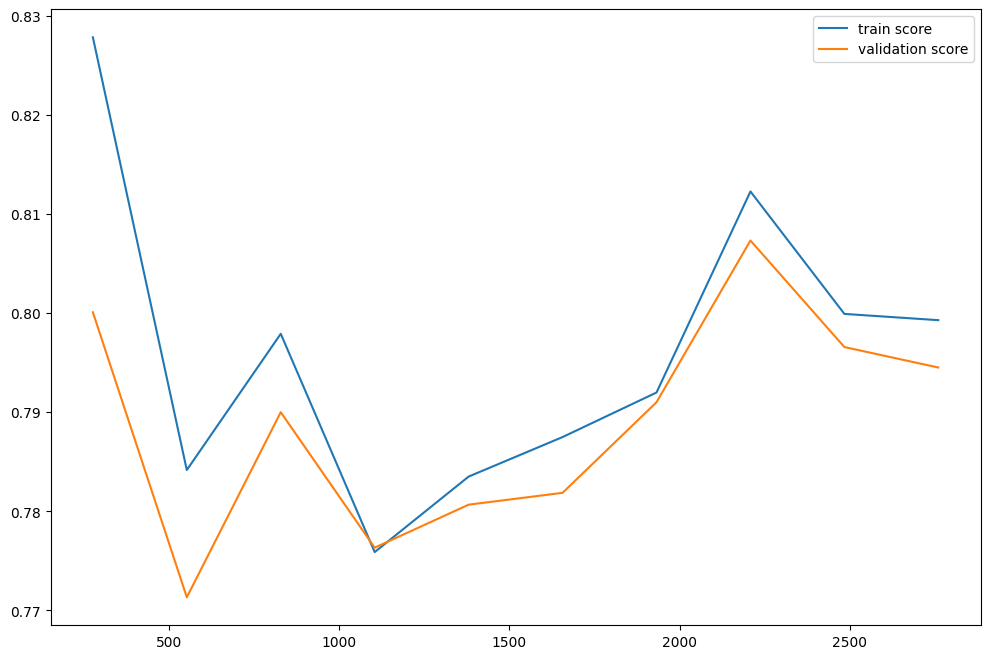

In [57]:
LogisticRegression = make_pipeline(preprocessor, LogisticRegression( C=0.1, max_iter=500, solver='lbfgs', random_state=0))
evaluation(LogisticRegression)

In [58]:
hyper_params_Reg = {'pipeline__polynomialfeatures__degree':[0, 1, 2, 3],
               'pipeline__selectkbest__k': range(8, 32),
                  'logisticregression__C':[0.01, 0.1]}

from sklearn.model_selection import GridSearchCV

grid_Reg = GridSearchCV(LogisticRegression, param_grid=hyper_params_Reg, cv=6)

grid_Reg.fit(X_train, y_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [237 238 242 243 939 940 949 954] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('polynomialfeatures',
                                                         PolynomialFeatures(degree=3,
                                                                            include_bias=False)),
                                                        ('selectkbest',
                                                         SelectKBest(k=14))])),
                                       ('logisticregression',
                                        LogisticRegression(C=0.1, max_iter=500,
                                                           random_state=0))]),
             param_grid={'logisticregression__C': [0.01, 0.1],
                         'pipeline__polynomialfeatures__degree': [0, 1, 2, 3],
                         'pipeline__selectkbest__k': range(8, 32)})

In [59]:
print(grid_Reg.best_params_)

y_pred = grid_Reg.predict(X_test)

print(classification_report(y_test, y_pred))

{'logisticregression__C': 0.1, 'pipeline__polynomialfeatures__degree': 1, 'pipeline__selectkbest__k': 31}
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       538
           1       0.90      0.86      0.88       383

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.90       921
weighted avg       0.90      0.90      0.90       921



### RandomForest, AdaBoost, SVM, KNN

In [18]:
X = df.drop("spam", axis = 1)
y = df["spam"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X1= StandardScaler().fit_transform(X)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor,  SVC(random_state=0))
KNN = make_pipeline(preprocessor, KNeighborsClassifier())

In [22]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

In [23]:
def evaluation1(model):

    model.fit(X_train1, y_train1)
    ypred = model.predict(X_test1)

    print(confusion_matrix(y_test1, ypred))
    print(classification_report(y_test1, ypred))

    N, train_score, val_score = learning_curve(model, X_train1, y_train1,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))


    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()


In [ ]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

RandomForest


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  252   253   262 ... 33314 33790 33793] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[503  35]
 [ 62 321]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       538
           1       0.90      0.84      0.87       383

    accuracy                           0.89       921
   macro avg       0.90      0.89      0.89       921
weighted avg       0.90      0.89      0.89       921



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   78   116   134 ... 33801 33803 33830] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  116   189   228 ... 33790 33793 33803] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  235   249   250 ... 33699 33790 33793] 

AdaBoost


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  252   253   262 ... 33314 33790 33793] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[512  26]
 [ 93 290]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       538
           1       0.92      0.76      0.83       383

    accuracy                           0.87       921
   macro avg       0.88      0.85      0.86       921
weighted avg       0.88      0.87      0.87       921



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   78   116   134 ... 33801 33803 33830] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  116   189   228 ... 33790 33793 33803] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  235   249   250 ... 33699 33790 33793] 

SVM


In [ ]:
RandomForest

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=8))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

In [ ]:
KNN

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=8))])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=8))])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [ ]:
AdaBoost

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=8))])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=0))])

In [95]:
hyper_params_1 = {'pipeline__polynomialfeatures__degree':[0, 1, 2, 3],
               'pipeline__selectkbest__k': range(4, 30)}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(RandomForest, param_grid=hyper_params_1, cv=6)

grid.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 252  253  262  263  268  983 1049 1050 1053 1054 1056 1069 1089 1365
 1414] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 252  253  262  263  267  268  983 1049 1050 1053 1054 1064 1069 1089
 1348 1365 1374 1414 1423] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_u

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('polynomialfeatures',
                                                         PolynomialFeatures(degree=3,
                                                                            include_bias=False)),
                                                        ('selectkbest',
                                                         SelectKBest(k=14))])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'pipeline__polynomialfeatures__degree': [0, 1, 2, 3],
                         'pipeline__selectkbest__k': range(4, 30)})

In [ ]:
print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'pipeline__polynomialfeatures__degree': 1, 'pipeline__selectkbest__k': 29}
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       538
           1       0.95      0.90      0.93       383

    accuracy                           0.94       921
   macro avg       0.94      0.94      0.94       921
weighted avg       0.94      0.94      0.94       921



In [ ]:
hyper_params_2 = {'pipeline__polynomialfeatures__degree':[0, 1, 2, 3],
               'pipeline__selectkbest__k': range(4, 30)}

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid1 = GridSearchCV(AdaBoost, param_grid=hyper_params_2, cv=5)

grid1.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 252  253  262  263  268  983 1049 1050 1053 1054 1056 1069 1089 1365
 1414] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 252  253  262  263  267  268  983 1049 1050 1053 1054 1064 1069 1089
 1348 1365 1374 1414 1423] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_u

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('polynomialfeatures',
                                                         PolynomialFeatures(include_bias=False)),
                                                        ('selectkbest',
                                                         SelectKBest(k=8))])),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier(random_state=0))]),
             param_grid={'pipeline__polynomialfeatures__degree': [0, 1, 2, 3],
                         'pipeline__selectkbest__k': range(4, 30)})

In [ ]:
print(grid1.best_params_)

y_pred = grid1.predict(X_test)

print(classification_report(y_test, y_pred))

{'pipeline__polynomialfeatures__degree': 1, 'pipeline__selectkbest__k': 29}
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       538
           1       0.91      0.89      0.90       383

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



In [ ]:
hyper_params_3 = {'svc__gamma':[1e-3, 0.0005],
                'svc__C':[1, 10, 100, 1000],
                'pipeline__polynomialfeatures__degree':[0, 1, 2, 3],
               'pipeline__selectkbest__k': range(4, 30)}

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid2 = GridSearchCV(SVM, param_grid=hyper_params_3, cv=5)

grid2.fit(X_train, y_train)


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 1414] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 249  252  253  260  262  263  264  268  981  983 1049 1050 1053 1054
 1069 1089 1123 1365 1414] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 252  253  255  262  263  268  728  983 1049 1050 1051 1052 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('polynomialfeatures',
                                                         PolynomialFeatures(include_bias=False)),
                                                        ('selectkbest',
                                                         SelectKBest(k=8))])),
                                       ('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=0))]),
             param_grid={'pipeline__polynomialfeatures__degree': [0, 1, 2, 3],
                         'pipeline__selectkbest__k': range(4, 30),
                         'svc__C': [1, 10, 100, 1000],
                         'svc__gamma': [0.001, 0.0005]})

In [ ]:
print(grid2.best_params_)

y_pred = grid2.predict(X_test)

print(classification_report(y_test, y_pred))

{'pipeline__polynomialfeatures__degree': 1, 'pipeline__selectkbest__k': 29, 'svc__C': 1000, 'svc__gamma': 0.001}
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       538
           1       0.93      0.89      0.91       383

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.92       921



In [ ]:
hyper_params_4 = {'pipeline__polynomialfeatures__degree':[0, 1, 2, 3],
               'pipeline__selectkbest__k': range(4, 30)}

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid3 = GridSearchCV(KNN, param_grid=hyper_params_4, cv=5)

grid3.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 252  253  262  263  268  983 1049 1050 1053 1054 1056 1069 1089 1365
 1414] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 252  253  262  263  267  268  983 1049 1050 1053 1054 1064 1069 1089
 1348 1365 1374 1414 1423] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_u

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('polynomialfeatures',
                                                         PolynomialFeatures(include_bias=False)),
                                                        ('selectkbest',
                                                         SelectKBest(k=8))])),
                                       ('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'pipeline__polynomialfeatures__degree': [0, 1, 2, 3],
                         'pipeline__selectkbest__k': range(4, 30)})

In [ ]:
print(grid3.best_params_)

y_pred = grid3.predict(X_test)

print(classification_report(y_test, y_pred))

{'pipeline__polynomialfeatures__degree': 1, 'pipeline__selectkbest__k': 28}
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       538
           1       0.92      0.85      0.88       383

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.90       921
weighted avg       0.91      0.91      0.91       921



In [ ]:
df1 = df.copy()

In [ ]:
corr_matrix = df1.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

seuil_correlation = 0.75

to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > seuil_correlation)]
data_sans_corr1 = df1.drop(to_drop, axis=1)

print("Colonnes conservées après suppression des corrélations:")
data_sans_corr1.head()

Colonnes conservées après suppression des corrélations:


<ipython-input-25-80e95996764a>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_semicolon  \
0             0.00            0.00  ...                 0.00   
1             0.00            0.94  ...                 0.00   
2             0.64            0.25  ...                 0.01   
3             0.31            0.63  ...                 0.00   
4             0.31            0.63  ...                 0.00   

   char_freq_leftbrac  char_freq_leftsquarebrac  char_freq_exclaim  \
0               0.000                       0.0              0.778   
1               0.132                       0.0              0.372   
2               0.143                       0.0              0.276   
3               0.137                       0.0              0.137   
4               0.135                       0.0              0.135   

   char_freq_dollar  char_freq_pound  capital_run_length_average  \
0             0.000            0.000                       3.756   
1             0.180            0.048                       5.114   
2             0.184            0.010                       9.821   
3             0.000            0.000                       3.537   
4             0.000            0.000                       3.537   

   capital_run_length_longest  capital_run_length_total  spam  
0                          61                       278     1  
1                         101                      1028     1  
2                         485                      2259     1  
3                          40                       191     1  
4                          40                       191     1  

[5 rows x 56 columns]

In [ ]:
X = data_sans_corr1.drop('spam', axis=1)
y = data_sans_corr1['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
hyper_params = {'pipeline__polynomialfeatures__degree':[0, 2, 3],
               'pipeline__selectkbest__k': range(4, 55)}

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid = RandomizedSearchCV(RandomForest, hyper_params, scoring='recall', cv=5,
                          n_iter=30)

grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 244  245  252  253  258 1005 1006 1009 1010 1023 1043 1300] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 244  245  252  253  257  258 1005 1006 1009 1010 1018 1023 1043 1284
 1300 1308] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: Use

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('polynomialfeatures',
                                                               PolynomialFeatures(include_bias=False)),
                                                              ('selectkbest',
                                                               SelectKBest(k=8))])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=0))]),
                   n_iter=30,
                   param_distributions={'pipeline__polynomialfeatures__degree': [0,
                                                                                 2,
                                                                                 3],
                                        'pipeline__selectkbest__k': range(4, 55)},
                   scoring='recall')



```
# Ce texte est au format code
```

Réseau de neurones


In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Définir la structure du modèle
num_layer1 = 100
num_layer2 = 100
num_layer3 = 80
# Modifier la couche d'entrée pour accepter la forme (None, 57)
model = keras.Sequential([
    layers.InputLayer(input_shape=(57,), name='Input_layer'),  # Modification ici
    layers.Dense(num_layer1, activation='relu', name='Hidden_layer1'),
    layers.Dense(num_layer2, activation='relu', name='Hidden_layer2'),
    layers.Dense(num_layer3, activation='relu', name='Hidden_layer3'),
    layers.Dense(1, activation='sigmoid', name='Output_layer')  # Utiliser 'sigmoid' pour un problème de classification binaire
])

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Afficher un résumé du modèle
model.summary()


# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Évaluer le modèle sur les données de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, 100)               5800      
                                                                 
 Hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 Hidden_layer3 (Dense)       (None, 80)                8080      
                                                                 
 Output_layer (Dense)        (None, 1)                 81        
                                                                 
Total params: 24061 (93.99 KB)
Trainable params: 24061 (93.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
92/92 [==============================] - 2s 7ms/step - loss: 0.3273 - accuracy: 0.8832 - val_loss: 0.2190 - val_accuracy: 0.9171
Epoch 2/2

In [76]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Définir le nombre de plis pour la validation croisée
num_folds = 5  # Vous pouvez ajuster cela en fonction de vos besoins

# Diviser les données en plis
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=0)

all_history = []

# Boucle sur les plis
for train_index, val_index in skf.split(X, y):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Créer le modèle
    model = keras.Sequential([
        layers.InputLayer(input_shape=(57,), name='Input_layer'),
        layers.Dense(num_layer1, activation='relu', name='Hidden_layer1'),
        layers.Dense(num_layer2, activation='relu', name='Hidden_layer2'),
        layers.Dense(num_layer3, activation='relu', name='Hidden_layer3'),
        layers.Dense(1, activation='sigmoid', name='Output_layer')
    ])

    # Compiler le modèle
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entraîner le modèle sur les données d'entraînement du pli
    history = model.fit(X_train_fold, y_train_fold, epochs=20, batch_size=32, validation_data=(X_val_fold, y_val_fold))

    # Ajouter l'historique à la liste
    all_history.append(history)

# Évaluer le modèle sur les données de test (vous pouvez également le faire pour chaque pli si nécessaire)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Epoch 1/20
115/115 [==============================] - 3s 10ms/step - loss: 0.3060 - accuracy: 0.8883 - val_loss: 0.2433 - val_accuracy: 0.9229
Epoch 2/20
115/115 [==============================] - 1s 7ms/step - loss: 0.1808 - accuracy: 0.9342 - val_loss: 0.1933 - val_accuracy: 0.9359
Epoch 3/20
115/115 [==============================] - 1s 7ms/step - loss: 0.1503 - accuracy: 0.9470 - val_loss: 0.1927 - val_accuracy: 0.9359
Epoch 4/20
115/115 [==============================] - 1s 8ms/step - loss: 0.1379 - accuracy: 0.9492 - val_loss: 0.1892 - val_accuracy: 0.9403
Epoch 5/20
115/115 [==============================] - 1s 9ms/step - loss: 0.1230 - accuracy: 0.9546 - val_loss: 0.1858 - val_accuracy: 0.9479
Epoch 6/20
115/115 [==============================] - 1s 6ms/step - loss: 0.1151 - accuracy: 0.9573 - val_loss: 0.1910 - val_accuracy: 0.9479
Epoch 7/20
115/115 [==============================] - 1s 6ms/step - loss: 0.0969 - accuracy: 0.9679 - val_loss: 0.2043 - val_accuracy: 0.9468
Epoch

In [78]:
y_pred = model.predict(X_test)
# Assuming y_pred contains continuous values between 0 and 1
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# Now use y_test and y_pred_binary in the classification report
print(classification_report(y_test, y_pred_binary))

29/29 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       538
           1       0.99      0.96      0.97       383

    accuracy                           0.98       921
   macro avg       0.98      0.98      0.98       921
weighted avg       0.98      0.98      0.98       921



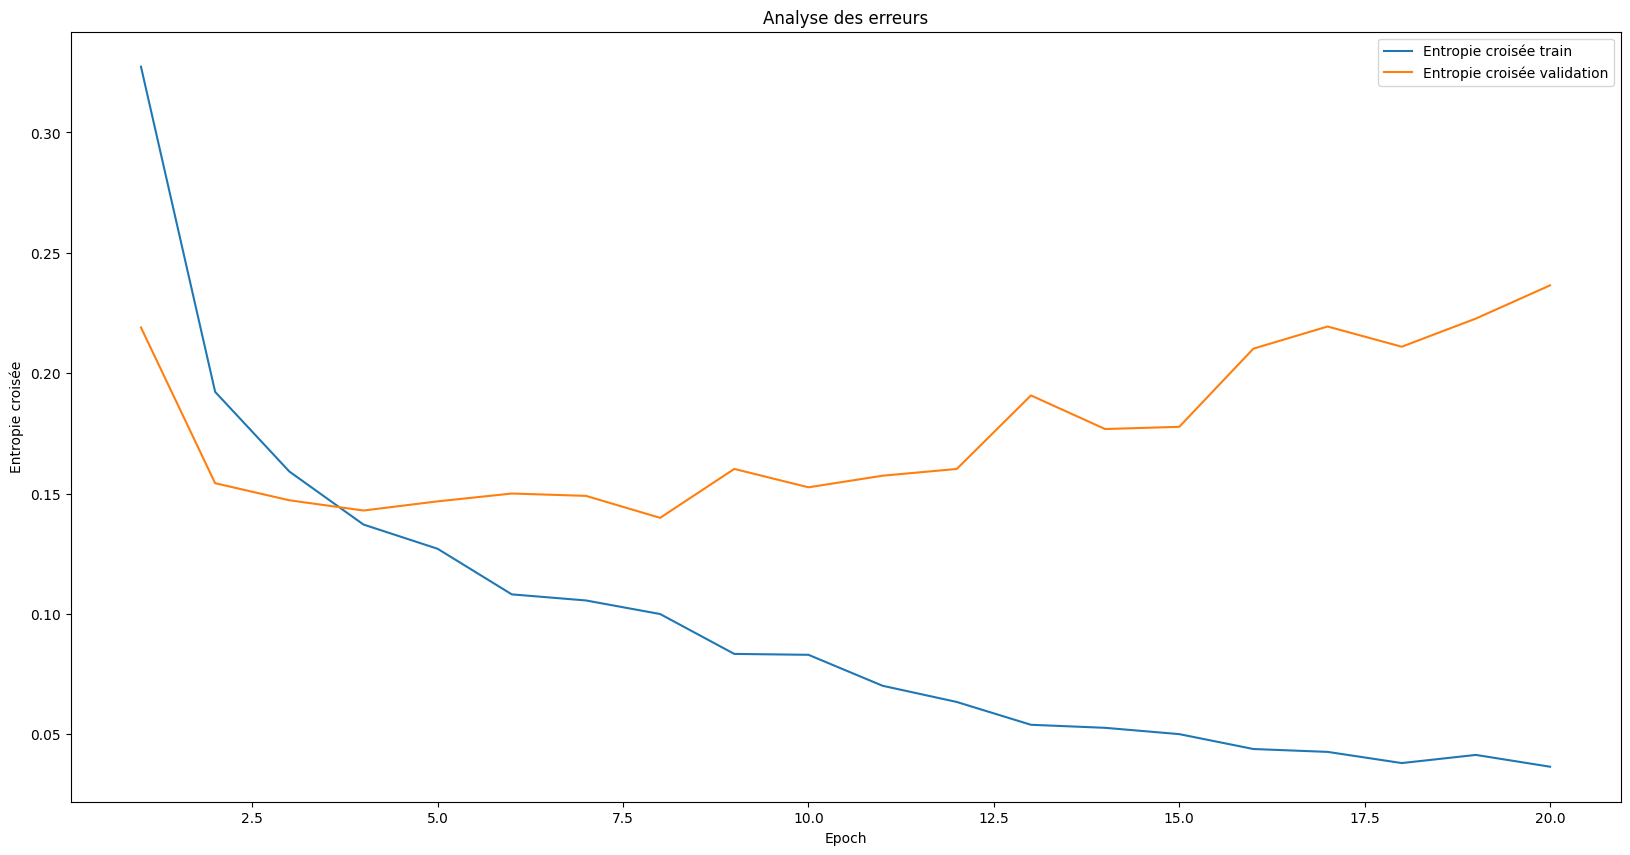

In [84]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Analyse des erreurs')
plt.xlabel('Epoch')
plt.ylabel('Entropie croisée')
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.legend(['Entropie croisée train', 'Entropie croisée validation'])
plt.show()

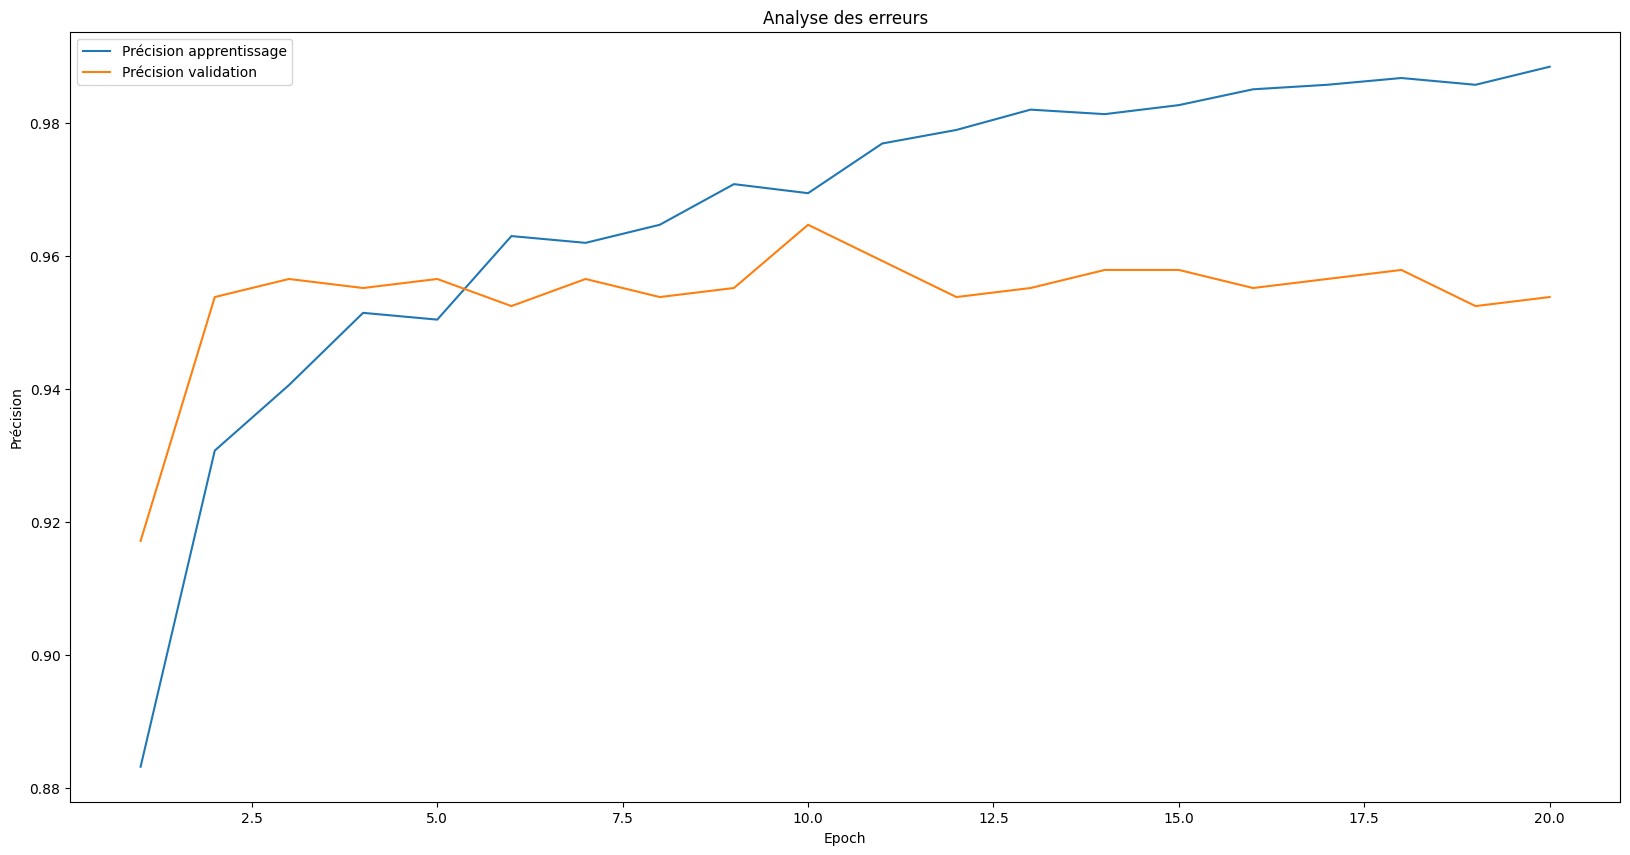

In [85]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Analyse des erreurs')
plt.xlabel('Epoch')
plt.ylabel('Précision')
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'])
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'])
plt.legend(['Précision apprentissage', 'Précision validation'])
plt.show()